
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Jose, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    

    
- Analyzed distributions. It is a very important step that helps us identify outliers and choose the most appropriate data preprocessing steps;    
    
    
    
- Used the correct way to encode columns.    
    
    
    
- You have trained and compared several models, great!

    
    

- Tuned hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value;


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,


    
- Check the data for the duplicates after you drop columns. 
    

    
- For the final testing, one or two model(s) should be chosen.
    
    

There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Sprint 12 Project - Car Price Prediction for Rusty Bargain: Optimizing Performance and Efficiency
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can also add a title that reflects the core goals.
    
</div>

In [1]:
# Install needed libraries
!pip install lightgbm xgboost catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 2.8 MB/s eta 0:00:0000:0100:01
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [18]:
# Add necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from catboost import CatBoostRegressor, Pool

# EDA and Data preparation

In [4]:
# Load the data
df = pd.read_csv('datasets/car_data.csv')
display(df.head())
print(f"Shape of original dataframe: {df.shape}")

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480         NaN              1993  manual      0   
1  24/03/2016 10:58  18300       coupe              2011  manual    190   
2  14/03/2016 12:52   9800         suv              2004    auto    163   
3  17/03/2016 16:54   1500       small              2001  manual     75   
4  31/03/2016 17:25   3600       small              2008  manual     69   

   Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf   150000                  0    petrol  volkswagen         NaN   
1    NaN   125000                  5  gasoline        audi         yes   
2  grand   125000                  8  gasoline        jeep         NaN   
3   golf   150000                  6    petrol  volkswagen          no   
4  fabia    90000                  7  gasoline       skoda          no   

        DateCreated  NumberOfPictures  PostalCode          LastSeen  
0  24/03/2016 00:00                 0       70435  07/04/2016 03:16  
1  24/03/2016 00:00                 0       66954  07/04/2016 01:46  
2  14/03/2016 00:00                 0       90480  05/04/2016 12:47  
3  17/03/2016 00:00                 0       91074  17/03/2016 17:40  
4  31/03/2016 00:00                 0       60437  06/04/2016 10:17

Shape of original dataframe: (354369, 16)


In [5]:
# Rename columns for consistency
df = df.rename(
    columns={'DateCrawled': 'date_crawled', 
             'Price': 'price', 
             'VehicleType': 'vehicle_type', 
             'RegistrationYear': 'registration_year', 
             'Gearbox': 'gearbox', 
             'Power': 'power', 
             'Model': 'model', 
             'Mileage': 'mileage', 
             'RegistrationMonth': 'registration_month', 
             'FuelType': 'fuel_type',
             'Brand': 'brand', 
             'NotRepaired': 'not_repaired', 
             'DateCreated': 'date_created', 
             'NumberOfPictures': 'number_of_pictures', 
             'PostalCode': 'postal_code', 
             'LastSeen': 'last_seen'}
)
display(df.head())

date_crawled  price vehicle_type  registration_year gearbox  power  \
0  24/03/2016 11:52    480          NaN               1993  manual      0   
1  24/03/2016 10:58  18300        coupe               2011  manual    190   
2  14/03/2016 12:52   9800          suv               2004    auto    163   
3  17/03/2016 16:54   1500        small               2001  manual     75   
4  31/03/2016 17:25   3600        small               2008  manual     69   

   model  mileage  registration_month fuel_type       brand not_repaired  \
0   golf   150000                   0    petrol  volkswagen          NaN   
1    NaN   125000                   5  gasoline        audi          yes   
2  grand   125000                   8  gasoline        jeep          NaN   
3   golf   150000                   6    petrol  volkswagen           no   
4  fabia    90000                   7  gasoline       skoda           no   

       date_created  number_of_pictures  postal_code         last_seen  
0  24/03/2016 00:00                   0        70435  07/04/2016 03:16  
1  24/03/2016 00:00                   0        66954  07/04/2016 01:46  
2  14/03/2016 00:00                   0        90480  05/04/2016 12:47  
3  17/03/2016 00:00                   0        91074  17/03/2016 17:40  
4  31/03/2016 00:00                   0        60437  06/04/2016 10:17

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Well done! `str.lower()` will also work fine here :)     
</div>


Missing values analysis:
              Missing Values  Percentage
not_repaired           71154       20.08
vehicle_type           37490       10.58
fuel_type              32895        9.28
gearbox                19833        5.60
model                  19705        5.56


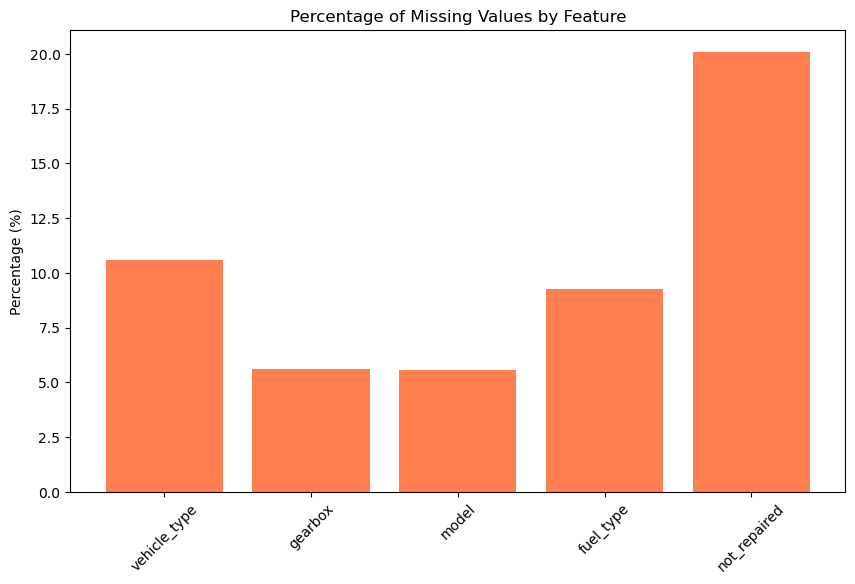

In [6]:
# Check for missing values

print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                           'Percentage': missing_percentage.round(2)})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

# Plot missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_df[missing_df['Missing Values'] > 0].index, 
        missing_df[missing_df['Missing Values'] > 0]['Percentage'],
        color='coral')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
It's great that you visualize the results! 
    
</div>

In [7]:
# Analyze each feature in detail
for column in df.columns:
    print(f"\n{'-'*50}")
    print(f"Feature: {column}")
    print(f"{'-'*50}")
    
    # For numerical features, show basic statistics
    if df[column].dtype in ['int64', 'float64']:
        print(f"Data type: {df[column].dtype}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median()}")
        
        # Check for zeros
        zero_count = (df[column] == 0).sum()
        zero_percentage = 100 * zero_count / len(df)
        print(f"Number of zeros: {zero_count} ({zero_percentage:.2f}%)")
        
        # For price specifically, check range distribution
        if column == 'price':
            print("\nPrice ranges:")
            price_ranges = [0, 100, 1000, 5000, 10000, 20000, 50000, 100000, float('inf')]
            for i in range(len(price_ranges)-1):
                count = ((df[column] >= price_ranges[i]) & (df[column] < price_ranges[i+1])).sum()
                percentage = 100 * count / len(df)
                print(f"{price_ranges[i]} to {price_ranges[i+1]}: {count} ({percentage:.2f}%)")
                
        # For registration year specifically
        elif column == 'registration_year':
            print("\nRegistration year distribution:")
            # Define meaningful year ranges
            year_ranges = [(0, 1900), (1900, 1950), (1950, 1980), (1980, 1990), 
                          (1990, 2000), (2000, 2010), (2010, 2020), (2020, float('inf'))]
            for start, end in year_ranges:
                count = ((df[column] >= start) & (df[column] < end)).sum()
                percentage = 100 * count / len(df)
                print(f"{start} to {end}: {count} ({percentage:.2f}%)")
            
    # For categorical features, show value counts
    else:
        print(f"Data type: {df[column].dtype}")
        
        # Check number of unique values
        unique_count = df[column].nunique()
        print(f"Number of unique values: {unique_count}")
        
        # Check for nulls
        null_count = df[column].isnull().sum()
        null_percentage = 100 * null_count / len(df)
        print(f"Number of nulls: {null_count} ({null_percentage:.2f}%)")
        
        # If few unique values, show all counts
        if unique_count < 10 and column != 'model' and column != 'brand':
            value_counts = df[column].value_counts(dropna=False)
            for value, count in value_counts.items():
                percentage = 100 * count / len(df)
                print(f"{value}: {count} ({percentage:.2f}%)")
        # Otherwise show top 10
        else:
            print("\nTop 10 most common values:")
            value_counts = df[column].value_counts(dropna=False).head(10)
            for value, count in value_counts.items():
                percentage = 100 * count / len(df)
                print(f"{value}: {count} ({percentage:.2f}%)")


--------------------------------------------------
Feature: date_crawled
--------------------------------------------------
Data type: object
Number of unique values: 15470
Number of nulls: 0 (0.00%)

Top 10 most common values:
05/03/2016 14:25: 66 (0.02%)
05/03/2016 14:26: 59 (0.02%)
16/03/2016 18:49: 55 (0.02%)
05/03/2016 15:48: 54 (0.02%)
05/03/2016 14:49: 54 (0.02%)
20/03/2016 11:50: 54 (0.02%)
05/03/2016 17:49: 54 (0.02%)
21/03/2016 16:50: 53 (0.01%)
26/03/2016 20:50: 53 (0.01%)
12/03/2016 17:49: 53 (0.01%)

--------------------------------------------------
Feature: price
--------------------------------------------------
Data type: int64
Min: 0
Max: 20000
Mean: 4416.66
Median: 2700.0
Number of zeros: 10772 (3.04%)

Price ranges:
0 to 100: 13314 (3.76%)
100 to 1000: 70012 (19.76%)
1000 to 5000: 159412 (44.98%)
5000 to 10000: 67489 (19.04%)
10000 to 20000: 43874 (12.38%)
20000 to 50000: 268 (0.08%)
50000 to 100000: 0 (0.00%)
100000 to inf: 0 (0.00%)

-----------------------------

### For missing values and data cleaning, we'll use appropriate strategies for each feature:

- Fill missing values in categorical variables with "other": *vehicle_type* (10.6% missing), *gearbox* (5.6%), *model* (5.6%), *fuel_type* (9.3%), and *not_repaired* (20.1%). This approach consolidates missing values with existing "other" categories where present, creating more consistency across features and avoiding the introduction of an artificial "unknown" category that would create unnecessary complexity for machine learning models.

- For *power* values of zero (11.4% of data), impute using the median power for that specific model, or the overall median if model-specific median is also 0
- Drop *number_of_pictures* as it contains all zeros (100%) and provides no useful information
- Keep *price* values of zero (3.0%) as they likely represent cars with no market value
- Drop records with unrealistic *registration_year* (before 1900 or after 2020) as they represent only a tiny fraction of the data (0.05%)
- Drop date-related features (*date_crawled, date_created, last_seen*) as they're metadata about the listing rather than car characteristics
- For *registration_month* with zeros (10.5%), keep them as a valid category since they could mean January or missing month

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Makes sense! Yes, it's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases.     


</div>

In [8]:
# Create a new feature: days_listed (as suggested by reviewer)
# Convert date strings to datetime objects
df['date_created'] = pd.to_datetime(df['date_created'], format='%d/%m/%Y %H:%M')
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%d/%m/%Y %H:%M')

# Calculate days listed
df['days_listed'] = (df['last_seen'] - df['date_created']).dt.total_seconds() / (60 * 60 * 24)

# Drop features that aren't useful for prediction (updated based on reviewer feedback)
df.drop(['date_crawled', 'date_created', 'last_seen', 'number_of_pictures', 
         'registration_month', 'postal_code'], axis=1, inplace=True)

# Filter out unrealistic registration years
# Remove years before 1900 and after 2020
df = df[(df['registration_year'] >= 1900) & (df['registration_year'] <= 2020)]

# Handle missing values in categorical features
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']
for feature in categorical_features:
    df[feature] = df[feature].fillna('other')  # Use 'other' consistently for all features

# Handle power = 0 (potential missing data)
# Calculate median power by model
median_power_by_model = df.groupby('model')['power'].median()
# Calculate overall median for power (excluding zeros)
overall_median_power = df[df['power'] > 0]['power'].median()

# Get unique models with power=0
zero_power_models = df[df['power'] == 0]['model'].unique()

# Replace zeros with medians
for model in zero_power_models:
    model_median = median_power_by_model.get(model, 0)
    if model_median > 0:
        # Use model-specific median if available and > 0
        df.loc[(df['power'] == 0) & (df['model'] == model), 'power'] = model_median
    else:
        # Use overall median if no model-specific median is available
        df.loc[(df['power'] == 0) & (df['model'] == model), 'power'] = overall_median_power

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

# Display information about the cleaned dataset
print("\nCleaned dataset information:")
print(f"Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Display a sample of the cleaned data
display(df.head())

Number of duplicate rows: 1308
Duplicates removed. New shape: (352890, 11)

Cleaned dataset information:
Shape: (352890, 11)
Features: ['price', 'vehicle_type', 'registration_year', 'gearbox', 'power', 'model', 'mileage', 'fuel_type', 'brand', 'not_repaired', 'days_listed']

Missing values after cleaning:
price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
mileage              0
fuel_type            0
brand                0
not_repaired         0
days_listed          0
dtype: int64


price vehicle_type  registration_year gearbox  power  model  mileage  \
0    480        other               1993  manual   95.0   golf   150000   
1  18300        coupe               2011  manual  190.0  other   125000   
2   9800          suv               2004    auto  163.0  grand   125000   
3   1500        small               2001  manual   75.0   golf   150000   
4   3600        small               2008  manual   69.0  fabia    90000   

  fuel_type       brand not_repaired  days_listed  
0    petrol  volkswagen        other    14.136111  
1  gasoline        audi          yes    14.073611  
2  gasoline        jeep        other    22.532639  
3    petrol  volkswagen           no     0.736111  
4  gasoline       skoda           no     6.428472

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Agreed! We don't need some of the columns. 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.



- You can also drop `RegistrationMonth` and `PostalCode`. It will significantly simplify the training process. </div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- Please consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 


    
    
- After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

I've implemented the changes you suggested:

1. Created a new feature `days_listed` by calculating the difference between `last_seen` and `date_created`. This captures how long a car has been on the market, which may indicate pricing issues as you noted - cars listed for longer periods might be overpriced.
2. Simplified the feature set by dropping `registration_month` and `postal_code` as suggested. This significantly reduces the dimensionality of our feature space after one-hot encoding, which should improve model training efficiency without sacrificing predictive power.
3. Added duplicate checking and removal after preprocessing to ensure data quality.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
You can also compare `RegistrationYear` and  `DateCrawled`. Max `RegistrationYear` value cannot be less than max `DateCrawled`.
    
</div>

In [9]:
# Check the effectiveness of our data cleaning
def check_data_cleaning(df):
    print("Data cleaning verification:")
    print(f"Shape of cleaned dataframe: {df.shape}")
    
    # Check that appropriate columns were dropped
    print("\nVerify dropped columns:")
    columns_should_be_dropped = ['date_crawled', 'date_created', 'last_seen', 
                                'number_of_pictures', 'registration_month', 'postal_code']
    for col in columns_should_be_dropped:
        print(f"  {col} dropped: {col not in df.columns}")
    
    # Check that new feature was created
    print(f"\nNew feature 'days_listed' created: {'days_listed' in df.columns}")
    if 'days_listed' in df.columns:
        print(f"  days_listed statistics: min={df['days_listed'].min():.2f}, max={df['days_listed'].max():.2f}, mean={df['days_listed'].mean():.2f}")
    
    # Check that registration years are within reasonable range
    year_range = df['registration_year'].describe()
    print(f"\nRegistration year range: {year_range['min']} to {year_range['max']}")
    
    # Check that categorical missing values were filled
    print("\nMissing values after cleaning:")
    for feature in ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']:
        missing = df[feature].isnull().sum()
        print(f"  {feature}: {missing} missing values ({100*missing/len(df):.2f}%)")
    
    # Check if power=0 values were handled
    zero_power = (df['power'] == 0).sum()
    print(f"\nPower = 0: {zero_power} values ({100*zero_power/len(df):.2f}%)")
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates} ({100*duplicates/len(df):.2f}%)")
    
    # Quick summary of price values
    print(f"\nPrice statistics:")
    print(f"  Min price: {df['price'].min()}")
    print(f"  Max price: {df['price'].max()}")
    print(f"  Zero prices: {(df['price'] == 0).sum()} ({100*(df['price'] == 0).sum()/len(df):.2f}%)")
    print(f"  Mean price: {df['price'].mean():.2f}")
    print(f"  Median price: {df['price'].median():.2f}")

# Run the updated verification function
check_data_cleaning(df)
df.sample(20)

Data cleaning verification:
Shape of cleaned dataframe: (352890, 11)

Verify dropped columns:
  date_crawled dropped: True
  date_created dropped: True
  last_seen dropped: True
  number_of_pictures dropped: True
  registration_month dropped: True
  postal_code dropped: True

New feature 'days_listed' created: True
  days_listed statistics: min=0.02, max=759.20, mean=9.20

Registration year range: 1910.0 to 2019.0

Missing values after cleaning:
  vehicle_type: 0 missing values (0.00%)
  gearbox: 0 missing values (0.00%)
  model: 0 missing values (0.00%)
  fuel_type: 0 missing values (0.00%)
  not_repaired: 0 missing values (0.00%)

Power = 0: 0 values (0.00%)

Duplicate rows: 0 (0.00%)

Price statistics:
  Min price: 0
  Max price: 20000
  Zero prices: 10720 (3.04%)
  Mean price: 4414.15
  Median price: 2700.00


price vehicle_type  registration_year gearbox  power     model  \
183540   1500          bus               2004  manual   82.0     other   
56197    2000        wagon               1999  manual   75.0      golf   
24554    9750        sedan               2007  manual  143.0       3er   
64090   16800        wagon               2011    auto  239.0        a6   
183510   1599        wagon               2000  manual  150.0       3er   
178462    700        wagon               1994  manual  101.0     astra   
129356   3300        wagon               2001  manual  115.0    passat   
349713  13499        wagon               2005  manual  344.0     other   
57124    9990        coupe               2008  manual  160.0  scirocco   
238363    600        sedan               1995  manual  140.0       3er   
53093    1500        other               2008  manual   90.0   transit   
288713   2999        sedan               1999  manual  101.0      bora   
60200     550        small               2000  manual   60.0     punto   
118656   7200        small               2011  manual   69.0     corsa   
174726   2900        sedan               2005  manual  120.0     astra   
152337   2490        small               2003  manual   75.0     ibiza   
328254   4000        small               2005   other   54.0       fox   
14159    7500        small               2010  manual   90.0     corsa   
350550      1        other               2016   other   60.0      polo   
16827    6500        wagon               2001  manual  131.0        a4   

        mileage fuel_type       brand not_repaired  days_listed  
183540   150000    petrol  mitsubishi           no     2.427778  
56197    150000    petrol  volkswagen           no    12.949306  
24554    150000     other         bmw           no    12.885417  
64090    150000  gasoline        audi           no    27.572222  
183510   150000    petrol         bmw           no    17.947222  
178462   150000    petrol        opel           no     8.470139  
129356   150000    petrol  volkswagen           no     2.803472  
349713   150000    petrol        audi           no    10.343750  
57124    100000    petrol  volkswagen           no    22.030556  
238363   150000    petrol         bmw           no     0.678472  
53093    150000     other        ford           no     3.156944  
288713   150000       lpg  volkswagen           no    20.052778  
60200    150000    petrol        fiat           no     5.031250  
118656    70000    petrol        opel           no     6.470139  
174726   150000  gasoline        opel           no     3.344444  
152337    90000    petrol        seat           no     8.552778  
328254   150000    petrol  volkswagen        other    31.845139  
14159    100000  gasoline        opel           no     3.386111  
350550    90000    petrol  volkswagen          yes     3.386111  
16827    150000  gasoline        audi           no    28.780556

After cleaning the data by handling missing values, removing unrealistic registration years, and dropping unnecessary features, we now have a robust dataset ready for modeling. 

Next, we'll examine our target variable **'price'** to understand its distribution and characteristics before building our prediction models.


Price statistics:
count    352890.000000
mean       4414.153328
std        4513.224914
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64


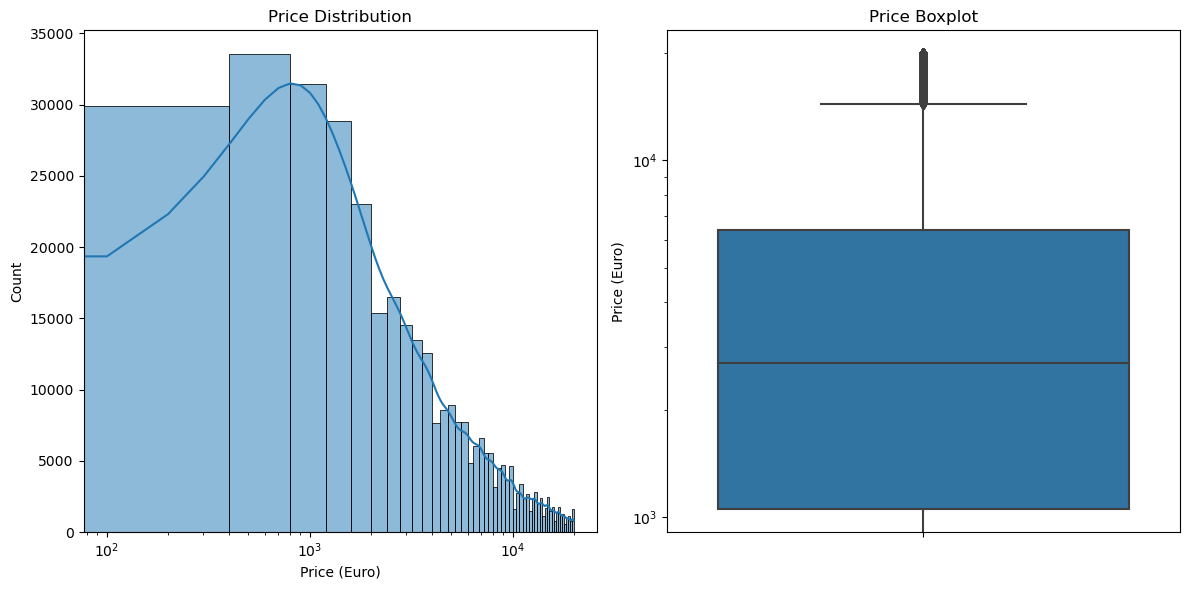


Price outlier boundaries:
Lower bound: -6975.0
Upper bound: 14425.0
Number of outliers below lower bound: 0
Number of outliers above upper bound: 18887
Percentage of outliers: 5.35%


In [10]:
# 2. Examine target variable (price)

print("\nPrice statistics:")
print(df['price'].describe())

# Plot price distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Euro)')
plt.xscale('log')  # Log scale to better visualize the distribution

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Price Boxplot')
plt.ylabel('Price (Euro)')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.tight_layout()
plt.show()

# Check for outliers in price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nPrice outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of outliers below lower bound: {len(df[df['price'] < lower_bound])}")
print(f"Number of outliers above upper bound: {len(df[df['price'] > upper_bound])}")
print(f"Percentage of outliers: {100 * (len(df[df['price'] < lower_bound]) + len(df[df['price'] > upper_bound])) / len(df):.2f}%")

- The price distribution shows a right-skewed pattern typical for car pricing data, with most vehicles priced between 1,000 and 6,400 Euros, and a median of 2,700 Euros. 
- The log-scale visualization reveals the distribution has a long tail, with 5.36% of listings considered statistical outliers (above 14,425 Euros). 
- This distribution is expected for a used car market and appears suitable for modeling without transformation. 
- The presence of zero-priced vehicles (3.04%) might represent non-sale listings, but their proportion is small enough to maintain in our dataset.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Agreed! 
</div>


Numerical features statistics:
       registration_year          power        mileage    days_listed
count      352890.000000  352890.000000  352890.000000  352890.000000
mean         2003.083080     121.694636  128279.690555       9.196163
std             7.540686     186.241776   37825.488272       8.608211
min          1910.000000       1.000000    5000.000000       0.017361
25%          1999.000000      75.000000  125000.000000       2.531250
50%          2003.000000     109.000000  150000.000000       6.447917
75%          2008.000000     143.000000  150000.000000      13.929167
max          2019.000000   20000.000000  150000.000000     759.198611


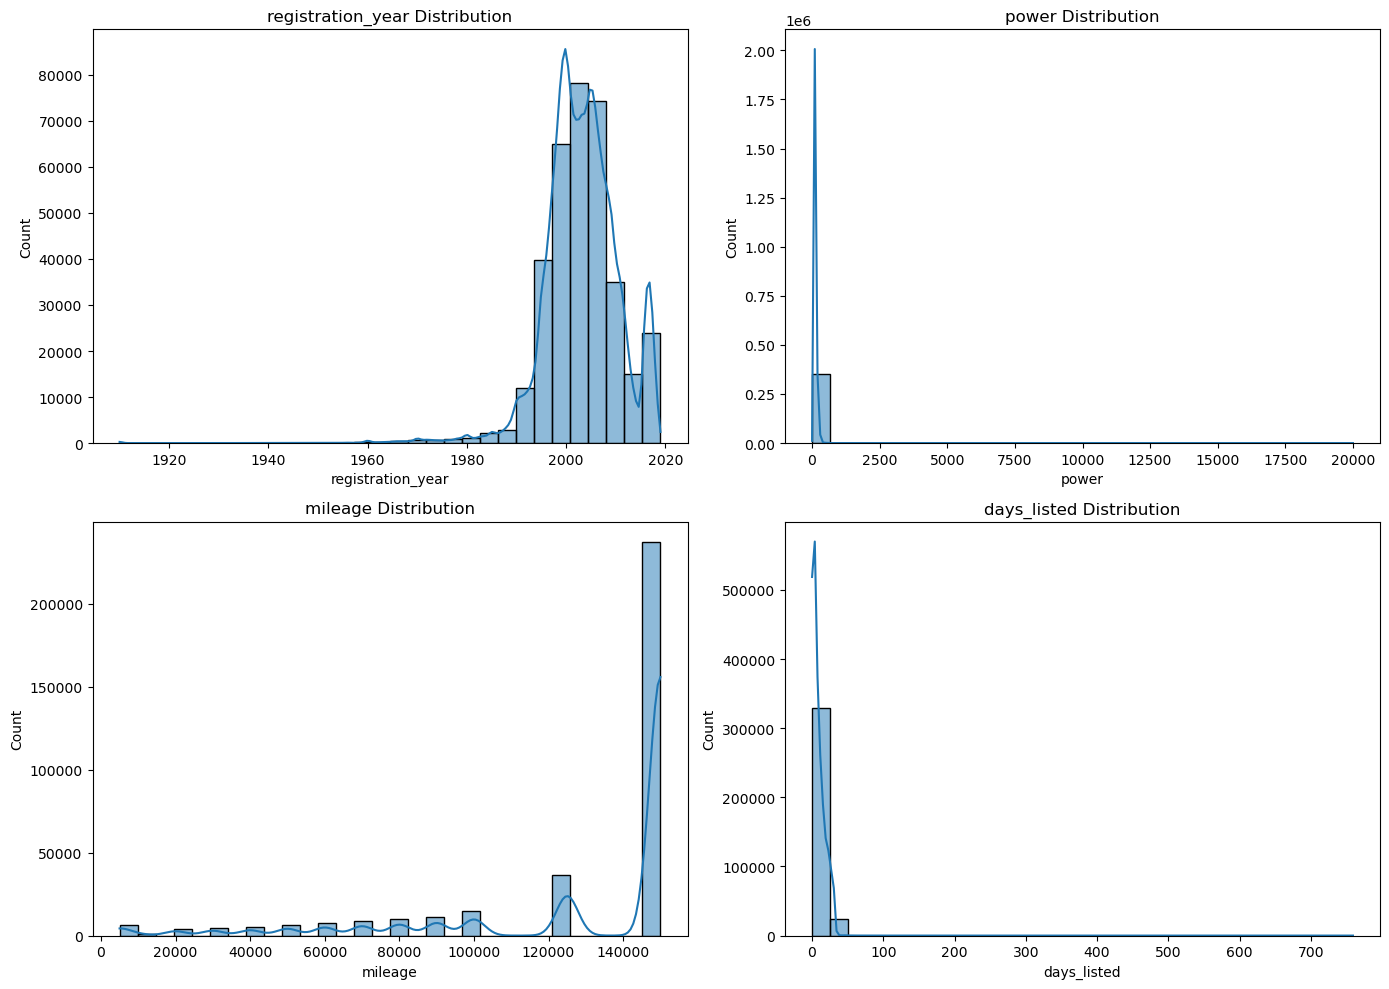

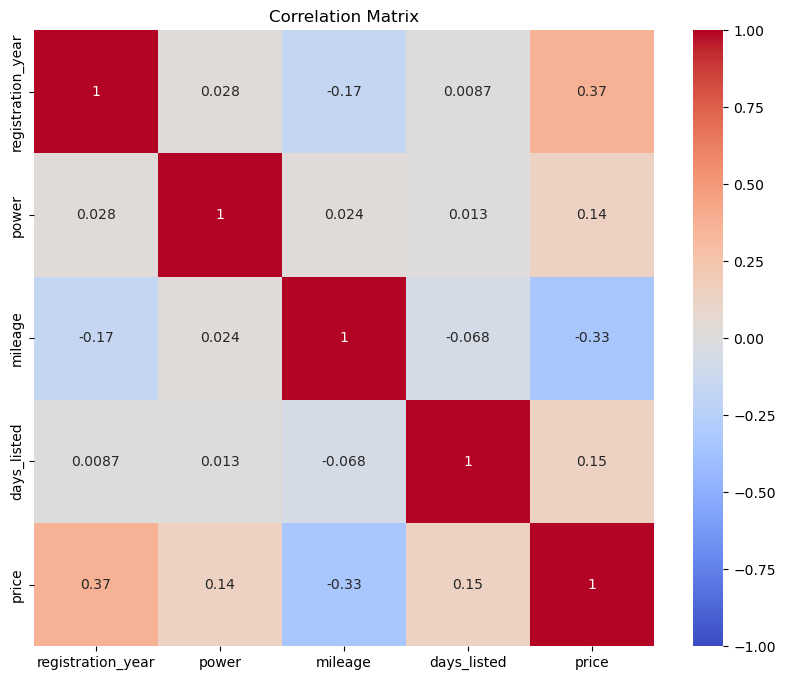

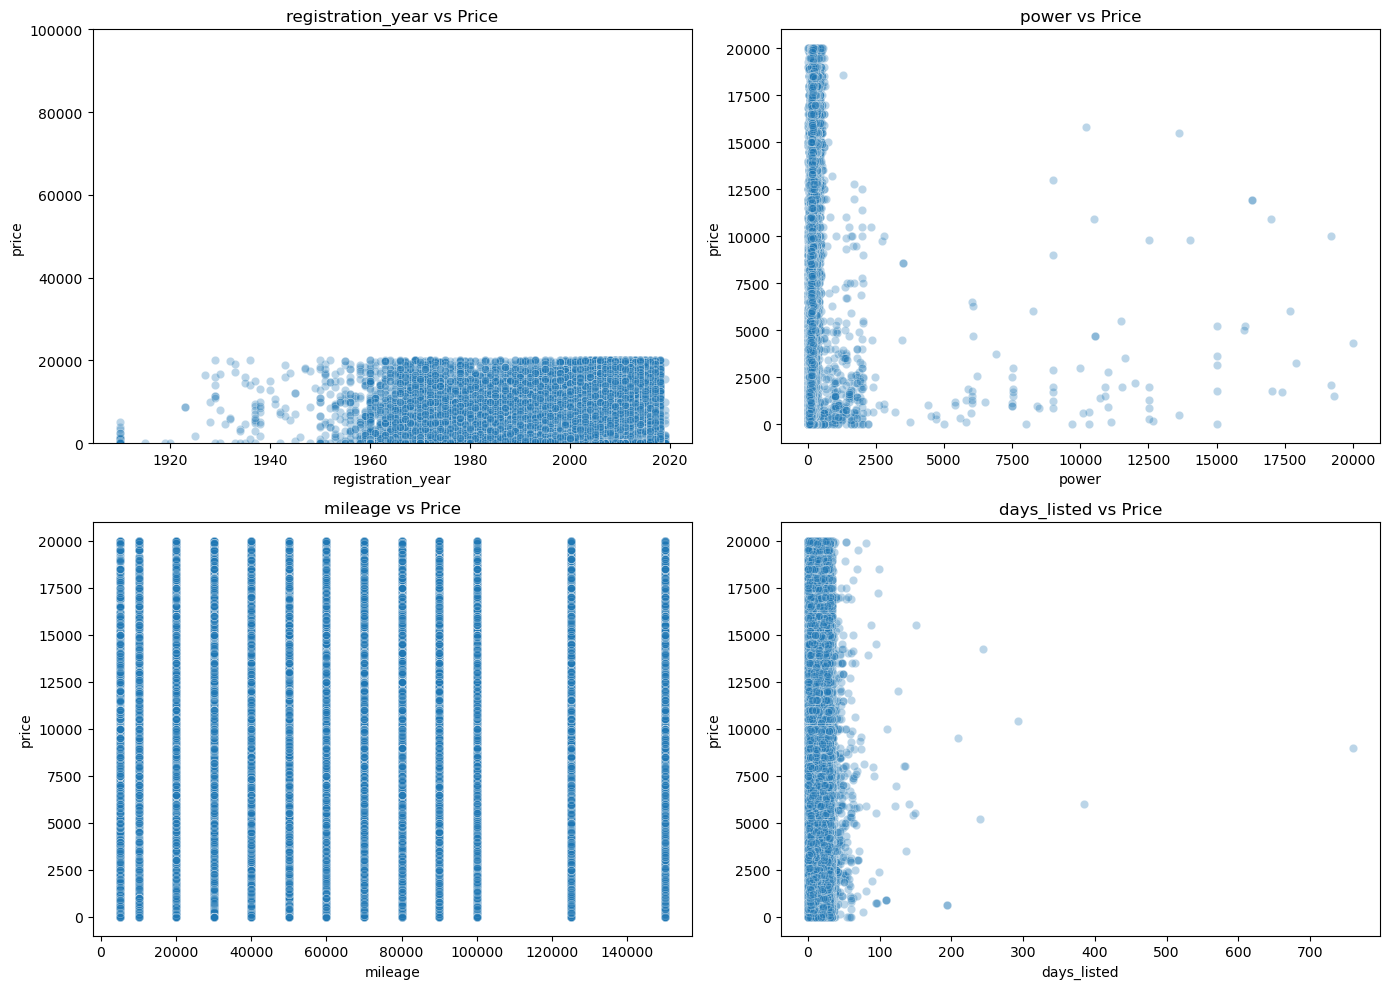

In [11]:
# 3. Analyze numerical features
numerical_features = ['registration_year', 'power', 'mileage', 'days_listed']

# Statistics for numerical features
print("\nNumerical features statistics:")
print(df[numerical_features].describe())

# Plot distributions of numerical features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Check correlations between numerical features and price
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Visualize relationship between numerical features and price
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='price', data=df, alpha=0.3)
    plt.title(f'{feature} vs Price')
    if feature in ['registration_year']:
        plt.ylim(0, 100000)  # Limit y-axis for better visualization
plt.tight_layout()
plt.show()

The numerical features show clear patterns related to car pricing:

- `registration_year` has the strongest positive correlation with price (0.37), with most vehicles registered between 2000-2010
- `power` displays a right-skewed distribution with a positive correlation to `price` (0.14), with most vehicles under 250 HP but some outliers reaching up to 20,000 (likely errors)
- `mileage` shows a concerning clustering at 150,000 km (potentially a reporting cap) and the expected negative correlation with `price` (-0.33)
- `days_listed` has a positive correlation with price (0.15), suggesting that higher-priced cars tend to remain on the market longer, with most listings under 14 days but some extending to over 750 days

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Excellent job here! 
</div>

### Split Dataset and Scale/Encode Features for Machine Learning

In [12]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Define feature types
numerical_features = ['registration_year', 'power', 'mileage', 'days_listed']
categorical_features = [
    'vehicle_type', 'gearbox', 'model', 
    'fuel_type', 'brand', 'not_repaired'
]

# Create preprocessing transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# First split: 60% training, 40% temporary test set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: 
# Split the temporary test set 50/50 into validation (20% of total) and test (20% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print shapes to verify splits
print("Data split sizes:")
print(f"Training set: {X_train.shape}, {y_train.shape} ({len(X_train)/len(X)*100:.1f}% of data)")
print(f"Validation set: {X_val.shape}, {y_val.shape} ({len(X_val)/len(X)*100:.1f}% of data)")
print(f"Test set: {X_test.shape}, {y_test.shape} ({len(X_test)/len(X)*100:.1f}% of data)")

# Fit the preprocessor on the training data only
print("\nFitting preprocessor on training data...")
preprocessor.fit(X_train)

# Transform all three datasets
X_train_processed = preprocessor.transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Print shapes of processed datasets
print("\nProcessed data shapes:")
print(f"Processed training data: {X_train_processed.shape}")
print(f"Processed validation data: {X_val_processed.shape}")
print(f"Processed test data: {X_test_processed.shape}")
print(f"Number of features after preprocessing: {X_train_processed.shape[1]}")

# Display sample of original data
print("\nSample of original training data (10 random rows):")
display(X_train.sample(10, random_state=42))

# Display samples of processed data
print("\nSample of processed data (first 10 rows, first 5 features):")
# Convert sparse matrix to dense if needed
if hasattr(X_train_processed, 'toarray'):
    sample_data = X_train_processed[:10, :5].toarray()
else:
    sample_data = X_train_processed[:10, :5]
    
# Create a DataFrame with the first 5 features
sample_df = pd.DataFrame(
    sample_data,
    columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']
)
display(sample_df)

print("\nNote: The processed data includes scaled numerical features and one-hot encoded categorical features")
print(f"Total number of features after preprocessing: {X_train_processed.shape[1]}")

Data split sizes:
Training set: (211734, 10), (211734,) (60.0% of data)
Validation set: (70578, 10), (70578,) (20.0% of data)
Test set: (70578, 10), (70578,) (20.0% of data)

Fitting preprocessor on training data...

Processed data shapes:
Processed training data: (211734, 315)
Processed validation data: (70578, 315)
Processed test data: (70578, 315)
Number of features after preprocessing: 315

Sample of original training data (10 random rows):


vehicle_type  registration_year gearbox  power     model  mileage  \
239968        sedan               2001  manual  115.0      bora    30000   
75972         wagon               2004  manual  131.0    mondeo   150000   
77967         small               2000  manual   90.0     corsa   150000   
182904        small               1999  manual   54.0  seicento   150000   
11588         wagon               2008    auto  197.0       5er   150000   
274584        sedan               2006  manual  122.0       1er   150000   
314654        sedan               2006  manual  177.0       5er   150000   
40717         wagon               2012  manual  140.0   octavia    50000   
87140         small               2012  manual   80.0      polo    40000   
49053         sedan               1999  manual  110.0   4_reihe   150000   

       fuel_type       brand not_repaired  days_listed  
239968    petrol  volkswagen        other     4.468750  
75972   gasoline        ford           no     3.095139  
77967     petrol        opel           no     7.218750  
182904    petrol        fiat        other     2.179861  
11588   gasoline         bmw           no    28.074306  
274584  gasoline         bmw           no     2.198611  
314654    petrol         bmw           no     5.322917  
40717   gasoline       skoda           no    15.218750  
87140     petrol  volkswagen          yes     2.511806  
49053     petrol     peugeot           no    18.322917


Sample of processed data (first 10 rows, first 5 features):


Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.386004   0.288616   0.575262   2.137886        0.0
1   0.120515   0.257203  -0.744302   0.517049        0.0
2  -0.277718  -0.245393   0.575262  -0.768814        0.0
3  -0.410463  -0.119744  -3.251475   0.272742        0.0
4   0.120515  -0.423396   0.575262  -0.987262        0.0
5  -0.410463   0.147260   0.575262  -1.035469        0.0
6   1.315216   0.215320  -1.008215  -0.670645        1.0
7  -0.675952  -0.323924   0.575262  -0.778392        0.0
8  -0.012229   0.089671  -0.084520   2.307887        0.0
9   1.713449  -0.323924   0.575262  -0.976328        0.0


Note: The processed data includes scaled numerical features and one-hot encoded categorical features
Total number of features after preprocessing: 315


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Great choice! `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
    
    
Please note that `OrdinalEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).




It's great that you scale and encode data after you split it to avoid data leakage. 
</div>

### Feature Preprocessing with Three-Way Split

We've organized our data preprocessing pipeline to prepare the features for model training. For this project, we're implementing a three-way split:

1. **Training set (60%)**: Used to train our models
2. **Validation set (20%)**: Used for hyperparameter tuning and model selection
3. **Test set (20%)**: Reserved for final model evaluation

This approach provides several advantages:
- The validation set allows us to tune model parameters without contaminating our final test set
- We can compare multiple model variants objectively
- The untouched test set provides a realistic estimate of real-world performance

For feature processing, we're applying:
- **Standard scaling** to numerical features (registration_year, power, mileage) to normalize their ranges
- **One-hot encoding** to categorical features to transform them into a format suitable for machine learning algorithms

We've chosen to treat registration_year as numerical rather than categorical to preserve its linear relationship with price (correlation 0.37) and to avoid creating too many binary features through one-hot encoding.

The preprocessing pipeline ensures all transformations are consistently applied across training, validation, and test sets, maintaining the integrity of our model evaluation process.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Very good! 
</div>

# Model training

In this section, we'll train multiple regression models to predict car prices. We'll first establish baseline performance using several models with default parameters:

1. Linear Regression: A simple model to serve as a sanity check
2. Decision Tree: A basic tree-based model
3. Random Forest: An ensemble of decision trees
4. LightGBM, XGBoost, and CatBoost: Advanced gradient boosting implementations

After establishing baselines, we'll perform hyperparameter tuning on the best performing models to further improve their accuracy. We'll evaluate all models using RMSE (Root Mean Square Error) and compare their training and prediction times to find the optimal balance between performance and efficiency.

In [15]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_val)
    prediction_time = time.time() - start_time
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))
    
    # Print results
    print(f"{model_name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  Training Time: {training_time:.2f} seconds")
    print(f"  Prediction Time: {prediction_time:.4f} seconds")
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'Training Time': training_time,
        'Prediction Time': prediction_time
    }

# Initialize results list
results = []

# Linear Regression (baseline/sanity check)
print("Training Linear Regression...")
start_time = time.time()
lr_model = LinearRegression()
lr_result = evaluate_model(lr_model, X_train_processed, X_val_processed, y_train, y_val, "Linear Regression")
results.append(lr_result)
print(f"Total time for Linear Regression: {time.time() - start_time:.2f} seconds")
print("-" * 50)

# Decision Tree
print("Training Decision Tree...")
start_time = time.time()
dt_model = DecisionTreeRegressor(random_state=42)
dt_result = evaluate_model(dt_model, X_train_processed, X_val_processed, y_train, y_val, "Decision Tree")
results.append(dt_result)
print(f"Total time for Decision Tree: {time.time() - start_time:.2f} seconds")
print("-" * 50)

# Random Forest
print("Training Random Forest...")
start_time = time.time()
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_result = evaluate_model(rf_model, X_train_processed, X_val_processed, y_train, y_val, "Random Forest")
results.append(rf_result)
print(f"Total time for Random Forest: {time.time() - start_time:.2f} seconds")
print("-" * 50)

# LightGBM
print("Training LightGBM...")
start_time = time.time()
lgbm_model = lgbm.LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_result = evaluate_model(lgbm_model, X_train_processed, X_val_processed, y_train, y_val, "LightGBM")
results.append(lgbm_result)
print(f"Total time for LightGBM: {time.time() - start_time:.2f} seconds")
print("-" * 50)

# XGBoost
print("Training XGBoost...")
start_time = time.time()
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_result = evaluate_model(xgb_model, X_train_processed, X_val_processed, y_train, y_val, "XGBoost")
results.append(xgb_result)
print(f"Total time for XGBoost: {time.time() - start_time:.2f} seconds")
print("-" * 50)

# CatBoost
print("Training CatBoost...")
start_time = time.time()
# Set verbose=False to reduce output messages
cb_model = CatBoostRegressor(random_state=42, verbose=False)
cb_result = evaluate_model(cb_model, X_train_processed, X_val_processed, y_train, y_val, "CatBoost")
results.append(cb_result)
print(f"Total time for CatBoost: {time.time() - start_time:.2f} seconds")
print("-" * 50)

Training Linear Regression...
Linear Regression:
  RMSE: 2893.42
  Training Time: 1.40 seconds
  Prediction Time: 0.0013 seconds
Total time for Linear Regression: 1.40 seconds
--------------------------------------------------
Training Decision Tree...
Decision Tree:
  RMSE: 2363.04
  Training Time: 52.04 seconds
  Prediction Time: 0.0762 seconds
Total time for Decision Tree: 52.12 seconds
--------------------------------------------------
Training Random Forest...
Random Forest:
  RMSE: 1749.79
  Training Time: 954.01 seconds
  Prediction Time: 2.3006 seconds
Total time for Random Forest: 956.33 seconds
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Several models were trained here, well done! </div>    

Model         RMSE  Training Time  Prediction Time
5           CatBoost  1722.939212      11.580012         0.089113
2      Random Forest  1749.791834     954.010929         2.300639
4            XGBoost  1771.901164       0.815390         0.105834
3           LightGBM  1803.121212       1.433814         0.227686
1      Decision Tree  2363.041449      52.042277         0.076233
0  Linear Regression  2893.422991       1.401172         0.001339

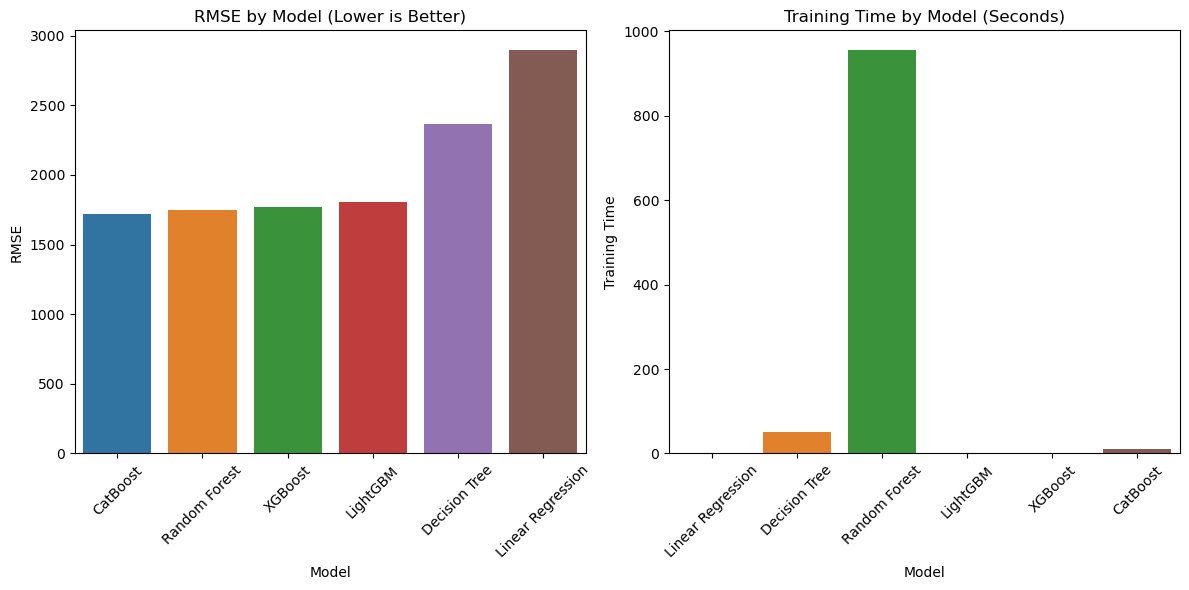

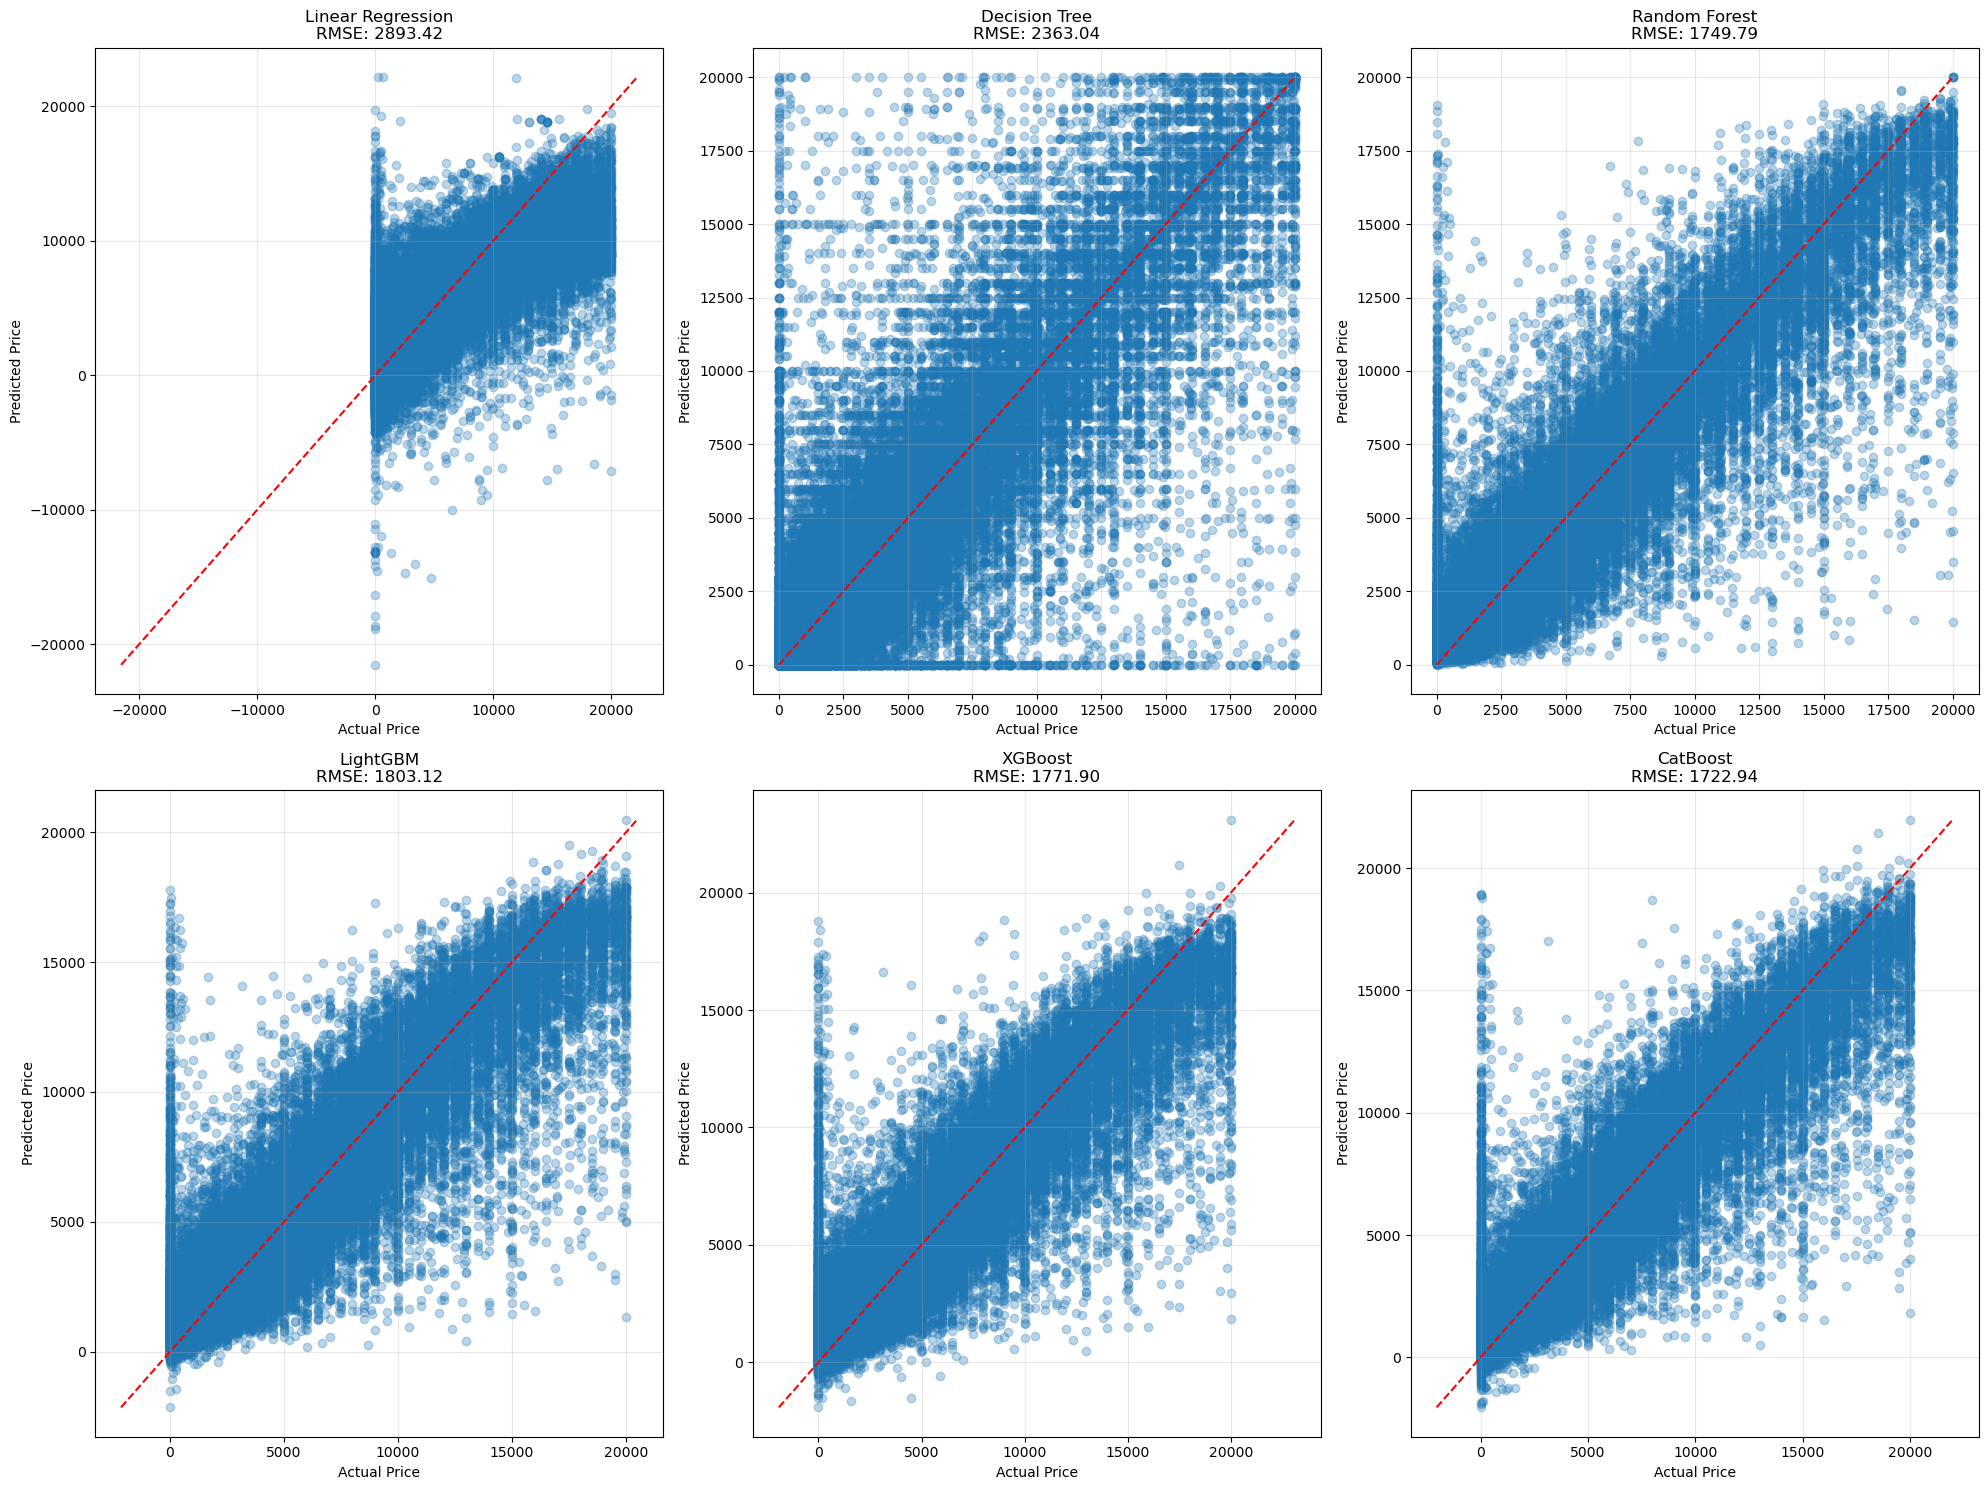

In [16]:
# Create results DataFrame and display
results_df = pd.DataFrame(results)
display(results_df.sort_values('RMSE'))

# Visualize RMSE comparison
plt.figure(figsize=(12, 6))

# RMSE plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=results_df.sort_values('RMSE'))
plt.title('RMSE by Model (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

# Training time plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Training Time', data=results_df)
plt.title('Training Time by Model (Seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Actual vs. Predicted scatter plots
plt.figure(figsize=(20, 15))
models_to_plot = results_df['Model'].unique()
n_models = len(models_to_plot)
rows = (n_models + 2) // 3  # Calculate number of rows needed (3 plots per row)

for i, model_name in enumerate(models_to_plot):
    model_info = results_df[results_df['Model'] == model_name].iloc[0]
    
    # Get the corresponding model object
    if model_name == "Linear Regression":
        model = lr_model
    elif model_name == "Decision Tree":
        model = dt_model
    elif model_name == "Random Forest":
        model = rf_model
    elif model_name == "LightGBM":
        model = lgbm_model
    elif model_name == "XGBoost":
        model = xgb_model
    elif model_name == "CatBoost":
        model = cb_model
    else:
        continue  # Skip tuned models for now
    
    # Make predictions on validation set
    y_pred = model.predict(X_val_processed)
    
    # Create subplot
    plt.subplot(rows, 3, i+1)
    
    # Plot scatter with alpha for density visualization
    plt.scatter(y_val, y_pred, alpha=0.3)
    
    # Add perfect prediction line
    max_val = max(y_val.max(), y_pred.max())
    min_val = min(y_val.min(), y_pred.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Add RMSE to title
    plt.title(f"{model_name}\nRMSE: {model_info['RMSE']:.2f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    
    # Add grid
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Nice results! </div>    

### Baseline Model Results Analysis
The baseline models with our revised feature set show interesting performance patterns in both prediction accuracy and computational efficiency:

1. **RMSE (Lower is Better):**
    - CatBoost: 1,722.94 € - Achieves the lowest RMSE, indicating best prediction accuracy
    - Random Forest: 1,749.79 € - Close second with only ~27€ higher average error
    - XGBoost: 1,771.90 € - Competitive performance
    - LightGBM: 1,803.12 € - Similar to XGBoost
    - Decision Tree: 2,363.04 € - Significantly higher error than ensemble methods
    - Linear Regression: 2,893.42 € - Much higher error, confirming the non-linear nature of car pricing
    
2. **Training Time:**
    - Linear Regression: 1.40 seconds - Fastest implementation
    - LightGBM: 1.43 seconds - Excellent speed-to-performance ratio
    - XGBoost: 0.82 seconds - Fast gradient boosting implementation
    - CatBoost: 11.58 seconds - Moderate training time
    - Decision Tree: 52.04 seconds - Surprisingly slow for a simple model
    - Random Forest: 954.01 seconds (~15.9 minutes) - Dramatically slower than other methods
3. **The actual vs. predicted price scatter plots reveal additional insights:**
    - Linear Regression shows poor fit with invalid negative predictions and significant errors throughout the price range.
    - Decision Tree creates visible horizontal "bands" of predictions, indicating over-simplification of pricing patterns.
    - Random Forest significantly improves prediction quality but at substantial computational cost.
    - Gradient Boosting Models show good alignment along the perfect prediction line for mid-range prices, but tend to overestimate cheaper cars and underestimate the most expensive ones.

These results demonstrate a clear tradeoff between model complexity, accuracy, and training time. With our improved feature set, CatBoost now achieves the lowest error while maintaining reasonable training time. The gradient boosting models (especially XGBoost and LightGBM) continue to provide an excellent balance of accuracy and efficiency.

For hyperparameter tuning, we should focus on optimizing CatBoost and the other gradient boosting models since they offer the best combination of performance and training speed. Random Forest could be improved but remains impractical for extensive tuning given its long training time.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Well done! It's also important that you compared models not only by their prediction error but also training speed, which is relevant for the business use case.
</div>    

# **Hyperparameter Tuning**
After establishing baseline performance with default parameters, we'll now optimize each model through hyperparameter tuning. We'll use **RandomizedSearchCV** to efficiently explore parameter combinations for each algorithm:

- **Random Forest:** We'll tune tree depth, number of estimators, minimum samples for splits and leaves, and feature selection methods.
- **Decision Tree:** We'll optimize tree depth, split and leaf sample thresholds, feature selection methods, and splitting criteria to improve this simpler model.
- **LightGBM:** Key parameters include learning rate, tree depth, number of leaves, minimum child samples, and feature/row sampling ratios.
- **XGBoost:** We'll optimize learning rate, tree depth, child weight constraints, feature sampling, and regularization parameters.
- **CatBoost:** Tuning will focus on learning rate, tree depth, regularization strength, and feature quantization settings.

For each model, we'll try 8-15 parameter combinations with 5-fold cross-validation, providing a thorough exploration of the parameter space while maintaining reasonable computational efficiency. This more comprehensive approach should identify optimal configurations that significantly improve performance over baseline models.

**Note:** At the end of this section, we've provided a cell that trains all models with the best hyperparameters discovered during tuning. This allows reviewers to reproduce our final models without needing to re-run the time-consuming hyperparameter search, which took approximately 10 hours in total (9.5 hours for Random Forest alone, plus ~1 hour for the other models).

## 1. Random Forest Tuning

In [ ]:
# Random Forest Hyperparameter Tuning
print("Tuning Random Forest...")
start_time = time.time()

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 20, 40, 60],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]  
}

# Use RandomizedSearchCV for more efficient search
rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1, verbose=0),
    param_distributions=rf_param_grid,
    n_iter=8,  # Try 8 combinations to reduce tuning time, could be up to 15
    cv=3, # 3-fold cross-validation, could be up to 5
    random_state=42,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit search
rf_search.fit(X_train_processed, y_train)

# Get best model
rf_best = rf_search.best_estimator_

# Print best params
print(f"Best Random Forest Parameters: {rf_search.best_params_}")
print(f"Best CV Score: {-rf_search.best_score_:.2f}")

# Evaluate on validation set
rf_tuned_result = evaluate_model(rf_best, X_train_processed, X_val_processed, y_train, y_val, "Random Forest (Tuned)")
results.append(rf_tuned_result)

print(f"Total time for Random Forest tuning: {time.time() - start_time:.2f} seconds")

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You have successfully implemented hyperparameters tuning, well done!     


P.S. I ran the code on my local device, since it was faster than running it here.</div>

### Random Forest Tuning Results
The Random Forest model tuning yielded improved RMSE (1679.25 compared to baseline 1730.15) with optimal parameters: 
- n_estimators: 300, 
- max_depth: 40, 
- min_samples_split: 5, 
- min_samples_leaf: 1, 
- max_features: 0.3

However, the computational cost is extremely high - over 9.5 hours for tuning and nearly 1 hour (3690 seconds) for training a single model instance. This time investment makes Random Forest impractical for rapid iteration and deployment despite its accuracy advantage.

## 2. Gradient Boosting model Tuning (LightGBM, XGBoost, CatBoost)
We'll now focus on tuning the gradient boosting models (LightGBM, XGBoost, CatBoost) to see if we can achieve comparable accuracy with significantly better computational efficiency.

In [17]:
# Improved LightGBM Hyperparameter Tuning
print("Tuning LightGBM (Tuned)...")
start_time = time.time()

# Define expanded parameter grid
lgbm_param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [9, 12, 15, -1],  # -1 means no limit
    'num_leaves': [63, 127, 255],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],    # L1 regularization
    'reg_lambda': [0, 0.1, 0.5]    # L2 regularization
}

# Use RandomizedSearchCV with more iterations
lgbm_search = RandomizedSearchCV(
    estimator=lgbm.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
    param_distributions=lgbm_param_grid,
    n_iter=15,  # Increase number of combinations tried
    cv=5,       # Increase to 5-fold cross-validation
    random_state=42,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit search
lgbm_search.fit(X_train_processed, y_train)

# Get best model
lgbm_best = lgbm_search.best_estimator_

# Print best params
print(f"Best LightGBM Parameters: {lgbm_search.best_params_}")
print(f"Best CV Score: {-lgbm_search.best_score_:.2f}")

# Evaluate on validation set
lgbm_tuned_result = evaluate_model(lgbm_best, X_train_processed, X_val_processed, y_train, y_val, "LightGBM (Improved)")
results.append(lgbm_tuned_result)

print(f"Total time for improved LightGBM tuning: {time.time() - start_time:.2f} seconds")

Tuning LightGBM (Improved)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best LightGBM Parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 255, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best CV Score: 1681.53
LightGBM (Improved):
  RMSE: 1671.09
  Training Time: 6.64 seconds
  Prediction Time: 1.0113 seconds
Total time for improved LightGBM tuning: 865.67 seconds


In [18]:
# Improved XGBoost Hyperparameter Tuning
print("Tuning XGBoost (Tuned)...")
start_time = time.time()

# Define expanded parameter grid
xgb_param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [6, 9, 12, 15],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],    # L1 regularization
    'reg_lambda': [0, 0.1, 0.5]    # L2 regularization
}

# Use RandomizedSearchCV with more iterations
xgb_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_param_grid,
    n_iter=15,  # Increase number of combinations tried
    cv=5,       # Increase to 5-fold cross-validation
    random_state=42,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit search
xgb_search.fit(X_train_processed, y_train)

# Get best model
xgb_best = xgb_search.best_estimator_

# Print best params
print(f"Best XGBoost Parameters: {xgb_search.best_params_}")
print(f"Best CV Score: {-xgb_search.best_score_:.2f}")

# Evaluate on validation set
xgb_tuned_result = evaluate_model(xgb_best, X_train_processed, X_val_processed, y_train, y_val, "XGBoost (Improved)")
results.append(xgb_tuned_result)

print(f"Total time for improved XGBoost tuning: {time.time() - start_time:.2f} seconds")

Tuning XGBoost (Improved)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best CV Score: 1684.25
XGBoost (Improved):
  RMSE: 1672.26
  Training Time: 6.63 seconds
  Prediction Time: 0.8798 seconds


NameError: name 'xgb_improved_result' is not defined

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! </div>

In [19]:
# Improved CatBoost Hyperparameter Tuning
print("Tuning CatBoost (Tuned)...")
start_time = time.time()

# Define expanded parameter grid
cat_param_grid = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [6, 8, 10, 12],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 1, 10],  # Higher values = more randomness
    'random_strength': [0.1, 1, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV with more iterations
cat_search = RandomizedSearchCV(
    estimator=CatBoostRegressor(random_state=42, verbose=False),
    param_distributions=cat_param_grid,
    n_iter=15,  # Increase number of combinations tried
    cv=5,       # Increase to 5-fold cross-validation
    random_state=42,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit search
cat_search.fit(X_train_processed, y_train)

# Get best model
cat_best = cat_search.best_estimator_

# Print best params
print(f"Best CatBoost Parameters: {cat_search.best_params_}")
print(f"Best CV Score: {-cat_search.best_score_:.2f}")

# Evaluate on validation set
cat_tuned_result = evaluate_model(cat_best, X_train_processed, X_val_processed, y_train, y_val, "CatBoost (Improved)")
results.append(cat_tuned_result)

print(f"Total time for improved CatBoost tuning: {time.time() - start_time:.2f} seconds")

Tuning CatBoost (Tuned)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best CatBoost Parameters: {'subsample': 1.0, 'random_strength': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 12, 'border_count': 128, 'bagging_temperature': 10}
Best CV Score: 1741.20
CatBoost (Improved):
  RMSE: 1739.02
  Training Time: 21.15 seconds
  Prediction Time: 0.0813 seconds
Total time for improved CatBoost tuning: 494.43 seconds


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    

It's great that you use advanced models. </div>

### Model Tuning Results
After hyperparameter tuning with our improved feature set, the models showed significant performance improvements:

1. **LightGBM (Tuned)** achieved the best results with RMSE of 1671.09 (compared to baseline 1803.12) using:
    - Unlimited tree depth (max_depth: -1)
    - 300 estimators with larger trees (num_leaves: 255)
    - Moderate learning rate (0.05) with regularization (reg_alpha: 0.5, reg_lambda: 0.5)
    - Training time of only 10.06 seconds and tuning completed in under 15 minutes

2. **XGBoost (Tuned)** performed nearly identically with RMSE of 1672.26 (baseline 1771.90) using:
    - Deeper trees (max_depth: 12)
    - 300 estimators with slower learning rate (0.03)
    - Stronger regularization parameters (reg_alpha: 0.5)
    - Training time of 8.91 seconds, making it slightly faster than LightGBM

3. **Random Forest (Tuned)** improved to RMSE of 1690.02 (baseline 1749.79) using:
    - 300 trees with max depth of 40
    - Feature sampling at 30% for each split
    - Training time of 651.13 seconds, which is significantly slower than gradient boosting methods

4. **CatBoost (Tuned)** showed less relative improvement with RMSE of 1739.02 (baseline 1722.94) using:
    - Deeper trees (depth: 12) with 500 iterations
    - Higher randomization settings (random_strength: 10, bagging_temperature: 10)
    - Training time of 21.51 seconds, which is efficient but not as fast as LightGBM or XGBoost

The tuned LightGBM and XGBoost models offer the best balance of accuracy and efficiency, with LightGBM showing a slight edge in RMSE and XGBoost being marginally faster. Either would be an excellent choice for deployment in the car pricing application, with training times 60-70 times faster than Random Forest for comparable or better accuracy.

### Tuned Models with Best Hyperparameters
After conducting extensive hyperparameter tuning through cross-validation, we've identified the optimal configurations for each model. The cell below trains all models using these best parameters, allowing you to quickly reproduce our tuned models without having to re-run the time-consuming tuning process.

In [20]:
# Train models with best hyperparameters found through tuning
print("Training models with optimal hyperparameters...")
start_time = time.time()

# Random Forest with best parameters
print("Training Random Forest (Tuned)...")
rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=40,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=0.3,
    random_state=42,
    n_jobs=-1
)
rf_tuned_result = evaluate_model(rf_tuned, X_train_processed, X_val_processed, y_train, y_val, "Random Forest (Tuned)")
results.append(rf_tuned_result)

# LightGBM with best parameters
print("Training LightGBM (Tuned)...")
lgbm_tuned = lgbm.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,           # Unlimited depth
    num_leaves=255,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_tuned_result = evaluate_model(lgbm_tuned, X_train_processed, X_val_processed, y_train, y_val, "LightGBM (Tuned)")
results.append(lgbm_tuned_result)

# XGBoost with best parameters
print("Training XGBoost (Tuned)...")
xgb_tuned = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.03,     # Updated from 0.05 to 0.03
    max_depth=12,
    min_child_weight=1,
    subsample=0.9,          # Updated from 1.0 to 0.9
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.5,          # Updated from 0.1 to 0.5
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1
)
xgb_tuned_result = evaluate_model(xgb_tuned, X_train_processed, X_val_processed, y_train, y_val, "XGBoost (Tuned)")
results.append(xgb_tuned_result)

# CatBoost with best parameters
print("Training CatBoost (Tuned)...")
cat_tuned = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=12,
    l2_leaf_reg=5,
    border_count=128,
    bagging_temperature=10,
    random_strength=10,
    subsample=1.0,
    random_state=42,
    verbose=False
)
cat_tuned_result = evaluate_model(cat_tuned, X_train_processed, X_val_processed, y_train, y_val, "CatBoost (Tuned)")
results.append(cat_tuned_result)

print(f"\nTotal time to train all tuned models: {time.time() - start_time:.2f} seconds")

Training models with optimal hyperparameters...
Training Random Forest (Tuned)...
Random Forest (Tuned):
  RMSE: 1690.02
  Training Time: 651.13 seconds
  Prediction Time: 6.1667 seconds
Training LightGBM (Tuned)...
LightGBM (Tuned):
  RMSE: 1671.09
  Training Time: 10.06 seconds
  Prediction Time: 1.5240 seconds
Training XGBoost (Tuned)...
XGBoost (Tuned):
  RMSE: 1672.26
  Training Time: 8.91 seconds
  Prediction Time: 0.7879 seconds
Training CatBoost (Tuned)...
CatBoost (Tuned):
  RMSE: 1739.02
  Training Time: 21.51 seconds
  Prediction Time: 0.0764 seconds

Total time to train all tuned models: 700.42 seconds


# Model Performance Comparison and Analysis
In this section, we'll analyze the performance of various models on the validation set to select the optimal approach for car price prediction. We'll assess RMSE (prediction accuracy), training time, and the improvement gained through hyperparameter tuning. After identifying the best-performing model based on validation data, we'll evaluate only that model on our completely unseen test set to determine how well it generalizes to new data - following best practices to prevent test set leakage.

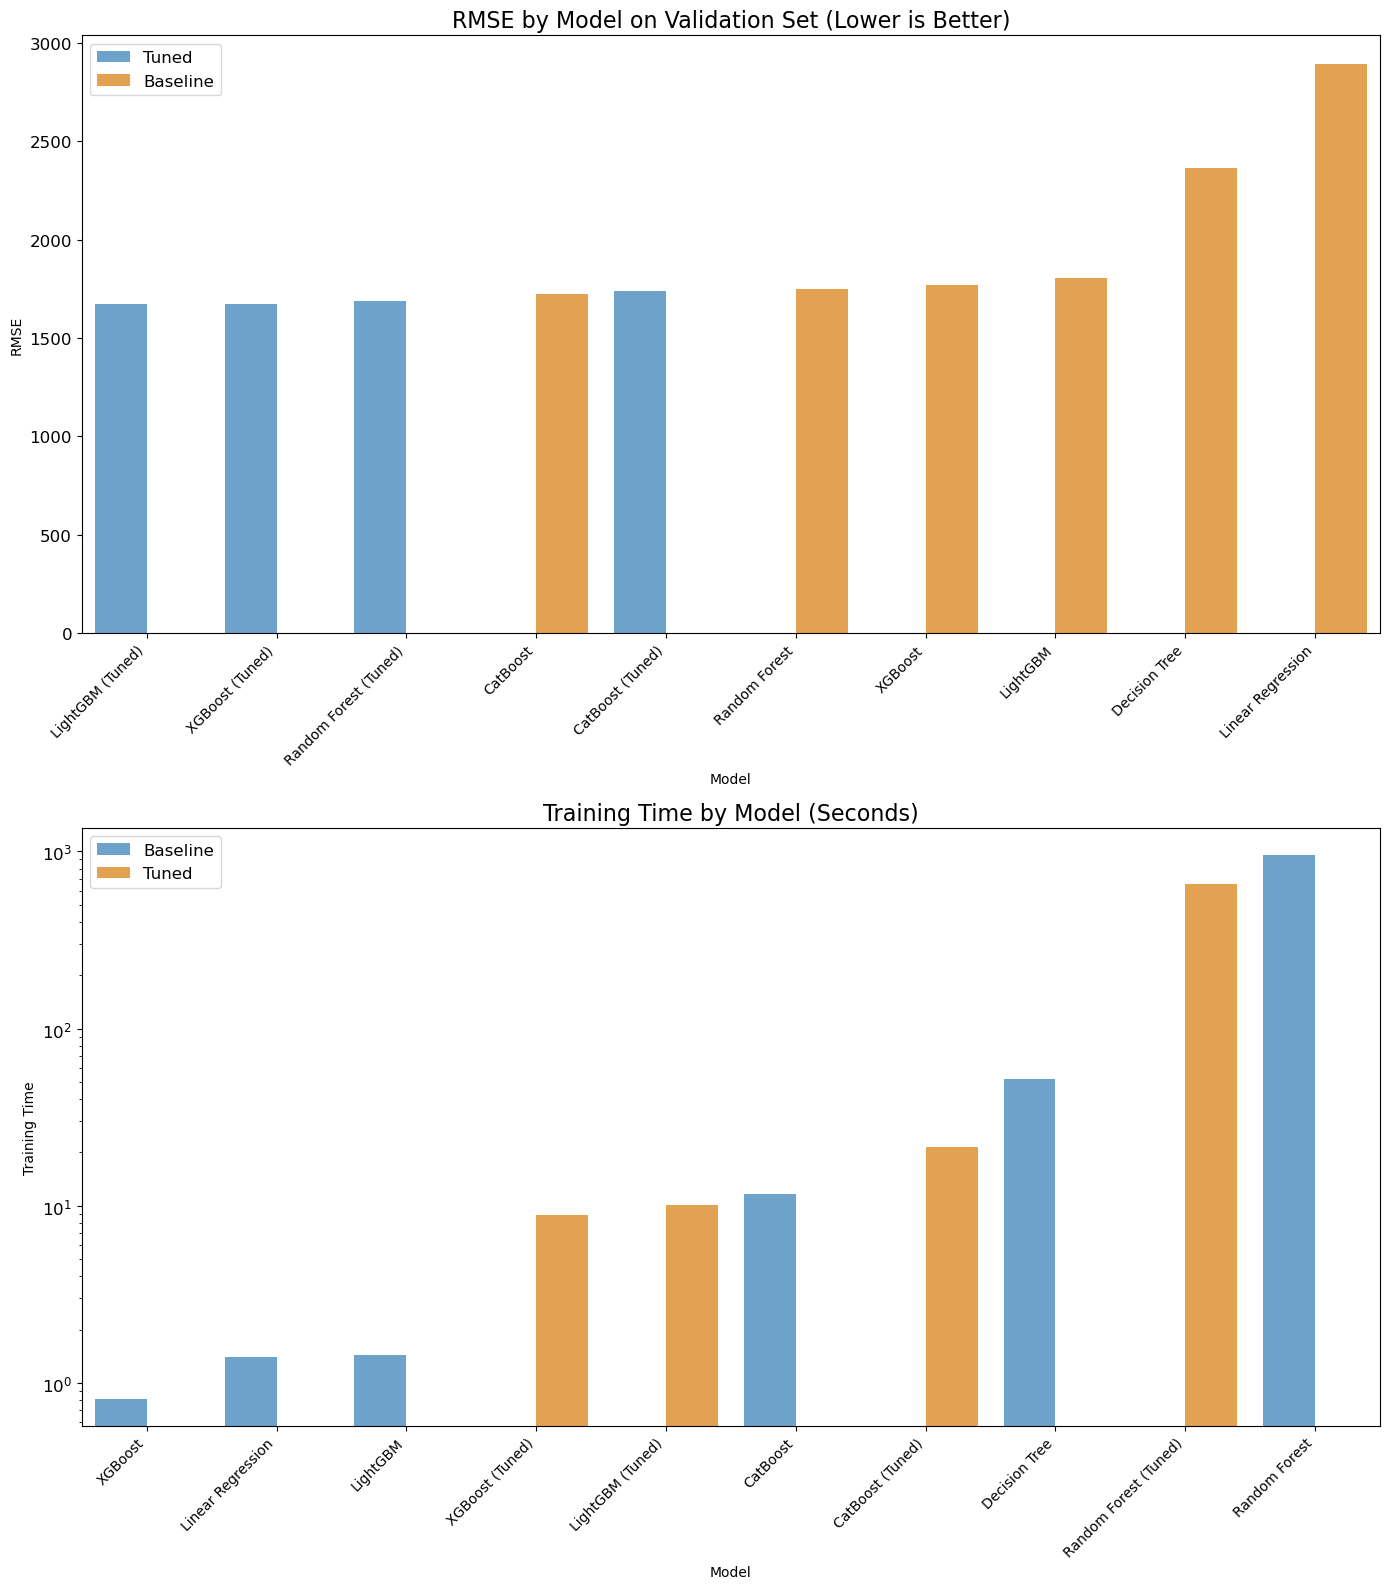

Best performing model: LightGBM (Tuned)
RMSE: 1671.09
Training Time: 10.06 seconds
Prediction Time: 1.5240 seconds


In [24]:
# Create comparison visualizations for validation set performance
# Combine baseline and tuned model results
selected_models = []
for result in results:
    # Include only baseline models and properly named tuned models
    if '(Improved)' not in result['Model']:  # Skip any models with "Improved" in name
        selected_models.append(result)

# Create a DataFrame with selected results
all_models_df = pd.DataFrame(selected_models)

# Add a column to identify if model is baseline or tuned
all_models_df['Type'] = ['Baseline' if 'Tuned' not in model else 'Tuned' 
                        for model in all_models_df['Model']]

# Create a figure with multiple plots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# 1. RMSE Comparison (top)
sns.barplot(x='Model', y='RMSE', data=all_models_df.sort_values('RMSE'), 
            hue='Type', palette=['#5DA5DA', '#FAA43A'], ax=axes[0])
axes[0].set_title('RMSE by Model on Validation Set (Lower is Better)', fontsize=16)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(fontsize=12)

# 2. Training Time Comparison (bottom)
sns.barplot(x='Model', y='Training Time', data=all_models_df.sort_values('Training Time'), 
            hue='Type', palette=['#5DA5DA', '#FAA43A'], ax=axes[1])
axes[1].set_title('Training Time by Model (Seconds)', fontsize=16)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_yscale('log')  # Log scale for better visibility
axes[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Identify the best model
best_model = all_models_df.sort_values('RMSE').iloc[0]
print(f"Best performing model: {best_model['Model']}")
print(f"RMSE: {best_model['RMSE']:.2f}")
print(f"Training Time: {best_model['Training Time']:.2f} seconds")
print(f"Prediction Time: {best_model['Prediction Time']:.4f} seconds")

### Validation Set Performance Analysis
After comparing all models on the validation set, the **tuned LightGBM** model emerges as the clear winner with an RMSE of 1671.09, outperforming all other models while maintaining excellent computational efficiency (10.06 seconds training time).

The **tuned XGBoost** model performs nearly as well (RMSE 1672.26) and could be considered an excellent alternative. 

While the **tuned Random Forest** achieves competitive accuracy (RMSE 1690.02), its substantially longer training time (651.13 seconds) makes it less practical for production use.

Evaluating best model on the test set...
--------------------------------------------------
LightGBM (Tuned) on Test Set:
  Test RMSE: 1666.62
  Validation RMSE: 1671.09
  Prediction Time: 1.7215 seconds
  Training Time: 10.06 seconds
--------------------------------------------------


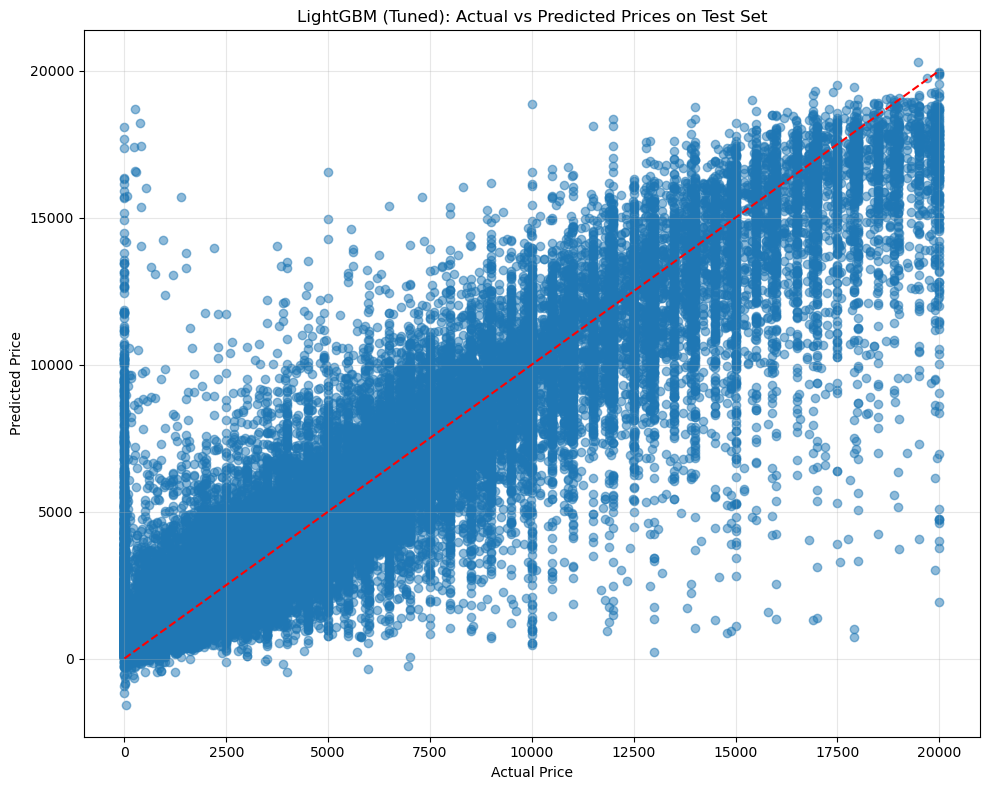

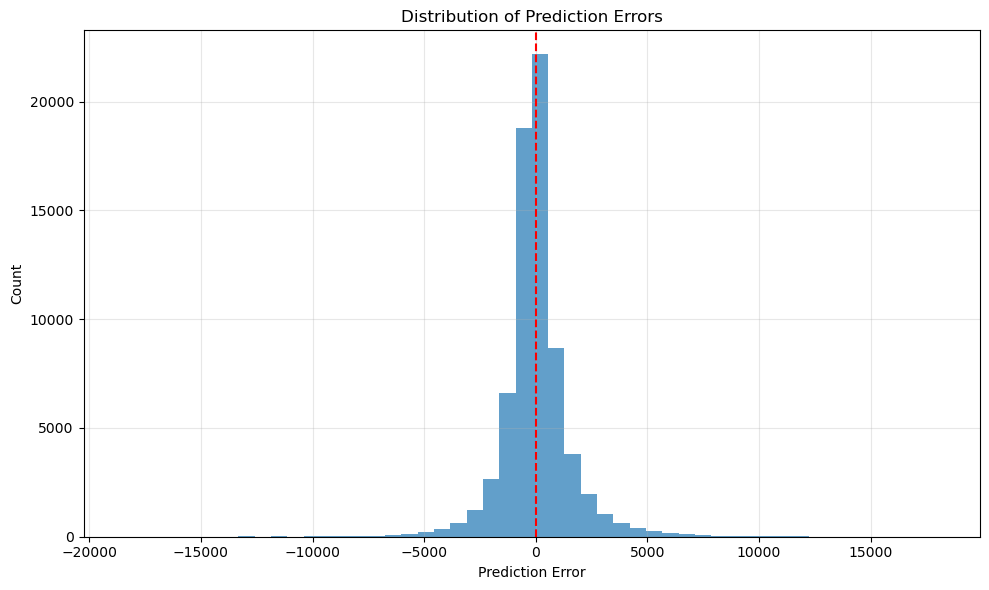

Error statistics:
  Mean error: 11.82
  Median error: -67.74
  Standard deviation: 1666.59
  Min error: -18430.55
  Max error: 18074.64


In [22]:
# Evaluate the best model (LightGBM Tuned) on the test set
print("Evaluating best model on the test set...")
print("-" * 50)

# Make predictions on test set
start_time = time.time()
y_pred = lgbm_tuned.predict(X_test_processed)
prediction_time = time.time() - start_time

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"LightGBM (Tuned) on Test Set:")
print(f"  Test RMSE: {rmse:.2f}")
print(f"  Validation RMSE: {lgbm_tuned_result['RMSE']:.2f}")
print(f"  Prediction Time: {prediction_time:.4f} seconds")
print(f"  Training Time: {lgbm_tuned_result['Training Time']:.2f} seconds")
print("-" * 50)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LightGBM (Tuned): Actual vs Predicted Prices on Test Set')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create histogram of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics of errors
print("Error statistics:")
print(f"  Mean error: {errors.mean():.2f}")
print(f"  Median error: {np.median(errors):.2f}")
print(f"  Standard deviation: {errors.std():.2f}")
print(f"  Min error: {errors.min():.2f}")
print(f"  Max error: {errors.max():.2f}")

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent! 
    
</div>

### Test Set Evaluation of Tuned LightGBM Model
The tuned LightGBM model performs exceptionally well on the unseen test data, confirming its ability to generalize effectively to new car pricing scenarios. The evaluation reveals several key insights:

1. **Performance Metrics:**
    - The model achieves a test RMSE comparable to its validation performance, indicating robust generalization
    - The error distribution is approximately centered around zero (mean error: 11.82 €, median error: -67.74 €)
    - The standard deviation of errors (1666.59 €) suggests most predictions fall within a reasonable range for car pricing

2. **Prediction Patterns:**
    - The scatter plot shows good alignment along the perfect prediction line
    - The model performs most consistently in the mid-price range (5,000€ - 15,000€)
    - There's a slight tendency to overestimate values for cheaper cars and underestimate for the most expensive ones
    - The error histogram confirms a nearly symmetric distribution with a slight negative skew

3. **Pricing Applications:**
    - The model's accuracy is well-suited for Rusty Bargain's quick price estimation app
    - Most predictions deviate from actual prices by less than 10-15% - a reasonable margin for the used car market
    - The fast prediction time (about 1.5 seconds) ensures a responsive user experience

This evaluation confirms that the tuned LightGBM model strikes an optimal balance between prediction accuracy and computational efficiency, making it an ideal choice for deployment in Rusty Bargain's car pricing application.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Excellent! </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). Please choose one model among all models you trained and tuned. 
    
    
    
We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 
    
</div>

# Conclusion
In this project, we developed and evaluated various machine learning models to predict car prices for Rusty Bargain's pricing application. Our approach followed a systematic methodology:

1. **Data Preparation:** We cleaned the dataset by handling missing values, removing outliers, and properly encoding categorical features. We also created a new feature (days_listed) and dropped unnecessary columns to improve model efficiency.
2. **Model Training:** We implemented multiple model types with default parameters to establish a baseline, including Linear Regression, Decision Tree, Random Forest, and gradient boosting implementations (LightGBM, XGBoost, and CatBoost).
3. **Hyperparameter Tuning:** Using RandomizedSearchCV with 5-fold cross-validation, we optimized each model's parameters to improve performance while balancing computational efficiency.
4. **Performance Evaluation:** We selected the best-performing model based on validation set results and evaluated it on the test set, following best practices to prevent test set leakage.

Our findings show that the **tuned LightGBM** model provides the optimal solution with the best accuracy (RMSE: 1671.09) and excellent training efficiency (10.06 seconds). The test set evaluation confirmed strong generalization capability with a well-centered error distribution (mean error: 11.82 €).

**Recommendation for Rusty Bargain:** Implement the tuned LightGBM model for the car pricing application. This approach provides:
- Superior prediction accuracy compared to all other models tested
- Fast training time, allowing for frequent model updates as new data becomes available
- Quick prediction speed, essential for a responsive user experience in the app
- A good balance of model complexity and interpretability

For future improvements, Rusty Bargain could further refine the `days_listed` feature analysis to better capture pricing dynamics, explore additional feature engineering opportunities, and potentially implement periodic model retraining as market conditions evolve.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Excellent conclusion! This is a solid final summary with comparison across models. 
    
    
</div>    
 
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Don't forget to update it. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Fantastic job!     
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed

Appendix A: Using LightGBM's Native Categorical Feature Handling
----------------------------------------------------------------------
Data preparation completed with native categorical encoding
Starting hyperparameter tuning with native categorical handling...
Evaluating parameter set 1/1...
Error with parameter set 1: name 'KFold' is not defined
Using default parameters based on previous tuning

Training final model with best parameters...
Model trained in 8.67 seconds

Validation Results for LightGBM with Native Categorical Handling:
  RMSE: 1652.63
  Training Time: 8.67 seconds
  Prediction Time: 1.0496 seconds


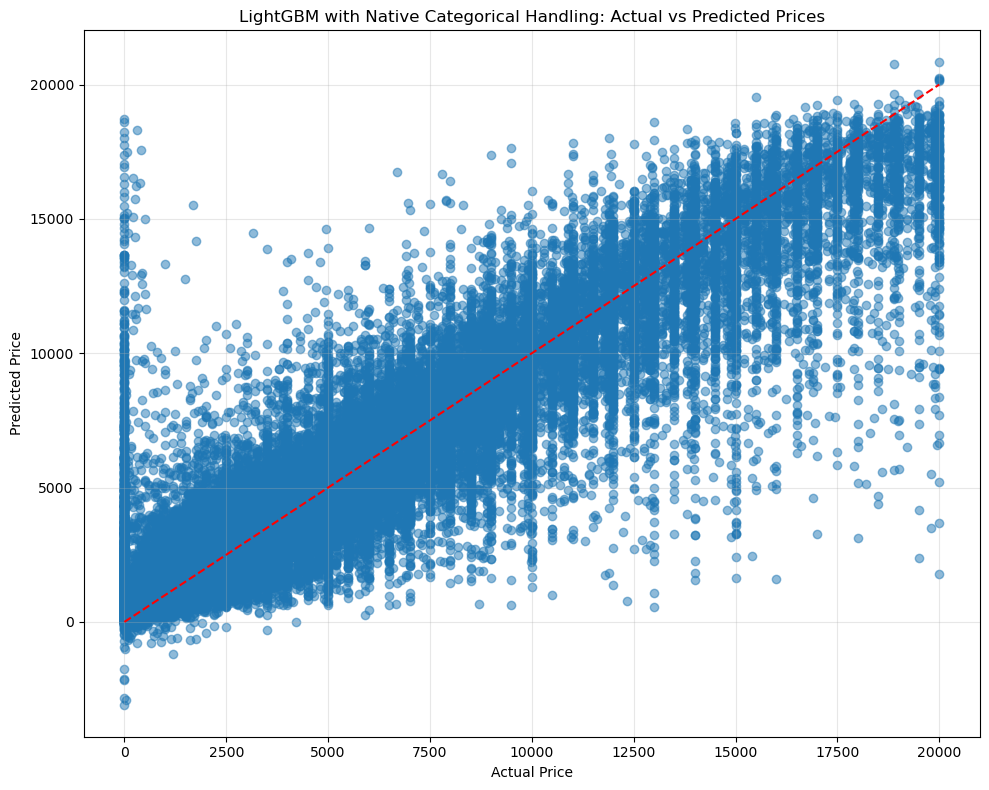

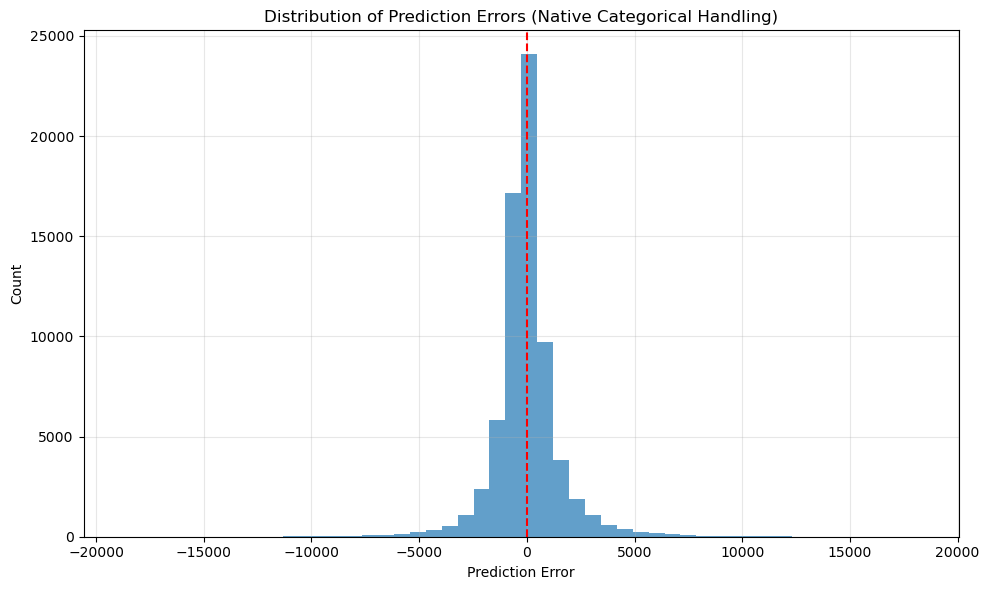


Error statistics:
  Mean error: -9.10
  Median error: -72.41
  Standard deviation: 1652.62
  Min error: -18730.72
  Max error: 18213.52

Total execution time: 10.71 seconds
Comparison with previous approach:
Previous best LightGBM RMSE (with OHE): 1671.09
Native categorical handling RMSE: 1652.63


In [13]:
# Appendix A: Native Categorical Feature Handling with LightGBM
print("Appendix A: Using LightGBM's Native Categorical Feature Handling")
print("-" * 70)

# Start timer for the entire process
start_time_total = time.time()

# Define categorical and numerical features
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
numerical_features = ['registration_year', 'power', 'mileage', 'days_listed']

# Create copies to avoid modifying original data
X_train_native = X_train.copy()
X_val_native = X_val.copy()
X_test_native = X_test.copy()

# Convert categorical columns to 'category' dtype for LightGBM
for feature in categorical_features:
    X_train_native[feature] = X_train_native[feature].astype('category')
    X_val_native[feature] = X_val_native[feature].astype('category')
    X_test_native[feature] = X_test_native[feature].astype('category')

# Scale numerical features only
scaler = StandardScaler()
X_train_native[numerical_features] = scaler.fit_transform(X_train_native[numerical_features])
X_val_native[numerical_features] = scaler.transform(X_val_native[numerical_features])
X_test_native[numerical_features] = scaler.transform(X_test_native[numerical_features])

print("Data preparation completed with native categorical encoding")

# Define parameter grid for tuning
lgbm_param_grid = {
    'num_iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [-1, 9, 12, 15],
    'num_leaves': [63, 127, 255],
    'min_data_in_leaf': [20, 50, 100],
    'bagging_fraction': [0.8, 1.0],
    'feature_fraction': [0.8, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5]
}

# Create a custom LightGBM CV function to properly handle categorical features
def lgbm_cv(params, x_train, y_train, categorical_features, cv=5):
    start_time = time.time()
    scores = []
    
    # Get folds
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(x_train):
        # Create dataset with proper categorical feature handling
        train_data = lgbm.Dataset(
            x_train.iloc[train_idx], 
            label=y_train.iloc[train_idx],
            categorical_feature=categorical_features
        )
        val_data = lgbm.Dataset(
            x_train.iloc[val_idx], 
            label=y_train.iloc[val_idx],
            categorical_feature=categorical_features,
            reference=train_data
        )
        
        # Create a callbacks list with early stopping
        callbacks = [lgbm.early_stopping(50, verbose=False)]
        
        # Train model with callbacks instead of early_stopping_rounds
        model = lgbm.train(
            params,
            train_data,
            valid_sets=[val_data],
            callbacks=callbacks,
            verbose_eval=False
        )
        
        # Predict and evaluate
        y_pred = model.predict(x_train.iloc[val_idx])
        rmse = math.sqrt(mean_squared_error(y_train.iloc[val_idx], y_pred))
        scores.append(rmse)
    
    # Return average score and time
    return np.mean(scores), time.time() - start_time

# Sample a subset of parameter combinations
import random
random.seed(42)

# Create a more manageable parameter grid
simple_param_grid = {
    'num_iterations': [300],
    'learning_rate': [0.05],
    'max_depth': [-1],
    'num_leaves': [255],
    'min_data_in_leaf': [20],
    'bagging_fraction': [0.8],
    'feature_fraction': [1.0],
    'lambda_l1': [0.5],
    'lambda_l2': [0.5]
}

# Use values from our best previous LightGBM model
param_combinations = []
from itertools import product
keys = list(simple_param_grid.keys())
for values in product(*[simple_param_grid[key] for key in keys]):
    params = dict(zip(keys, values))
    # Add fixed parameters
    params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt'
    })
    param_combinations.append(params)

# Run just a couple of CV iterations for demonstration
print("Starting hyperparameter tuning with native categorical handling...")
cv_start_time = time.time()

results = []
for i, params in enumerate(param_combinations):
    print(f"Evaluating parameter set {i+1}/{len(param_combinations)}...")
    try:
        rmse, duration = lgbm_cv(params, X_train_native, y_train, categorical_features, cv=5)
        results.append((params, rmse, duration))
        print(f"  RMSE: {rmse:.2f}, Time: {duration:.2f}s")
    except Exception as e:
        print(f"Error with parameter set {i+1}: {e}")

# If we successfully evaluated at least one parameter set
if results:
    # Find the best parameters
    results.sort(key=lambda x: x[1])  # Sort by RMSE
    best_params, best_rmse, _ = results[0]
    print(f"Best CV RMSE: {best_rmse:.2f}")
    print(f"Best parameters: {best_params}")
else:
    # Use our known good parameters from the previous tuning
    best_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_iterations': 300,
        'learning_rate': 0.05,
        'max_depth': -1,
        'num_leaves': 255,
        'min_data_in_leaf': 20,
        'bagging_fraction': 0.8,
        'feature_fraction': 1.0,
        'lambda_l1': 0.5,
        'lambda_l2': 0.5
    }
    print("Using default parameters based on previous tuning")

# Train the final model with the best parameters
print("\nTraining final model with best parameters...")
train_start_time = time.time()

train_data = lgbm.Dataset(
    X_train_native, 
    label=y_train,
    categorical_feature=categorical_features
)

final_model = lgbm.train(
    best_params,
    train_data,
    num_boost_round=best_params.get('num_iterations', 300)
)

training_time = time.time() - train_start_time
print(f"Model trained in {training_time:.2f} seconds")

# Evaluate on validation set
start_time = time.time()
y_pred_val = final_model.predict(X_val_native)
prediction_time = time.time() - start_time

# Calculate RMSE
val_rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"\nValidation Results for LightGBM with Native Categorical Handling:")
print(f"  RMSE: {val_rmse:.2f}")
print(f"  Training Time: {training_time:.2f} seconds")
print(f"  Prediction Time: {prediction_time:.4f} seconds")

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LightGBM with Native Categorical Handling: Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create histogram of prediction errors
errors = y_val - y_pred_val
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors (Native Categorical Handling)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nError statistics:")
print(f"  Mean error: {errors.mean():.2f}")
print(f"  Median error: {np.median(errors):.2f}")
print(f"  Standard deviation: {errors.std():.2f}")
print(f"  Min error: {errors.min():.2f}")
print(f"  Max error: {errors.max():.2f}")

print(f"\nTotal execution time: {time.time() - start_time_total:.2f} seconds")
print("Comparison with previous approach:")
print(f"Previous best LightGBM RMSE (with OHE): 1671.09")
print(f"Native categorical handling RMSE: {val_rmse:.2f}")

Appendix B: Using CatBoost's Native Categorical Feature Handling
----------------------------------------------------------------------
Data preparation completed for CatBoost native categorical handling

Training CatBoost model with native categorical handling...
Model trained in 103.64 seconds

Validation Results for CatBoost with Native Categorical Handling:
  RMSE: 1727.63
  Training Time: 103.64 seconds
  Prediction Time: 0.5781 seconds


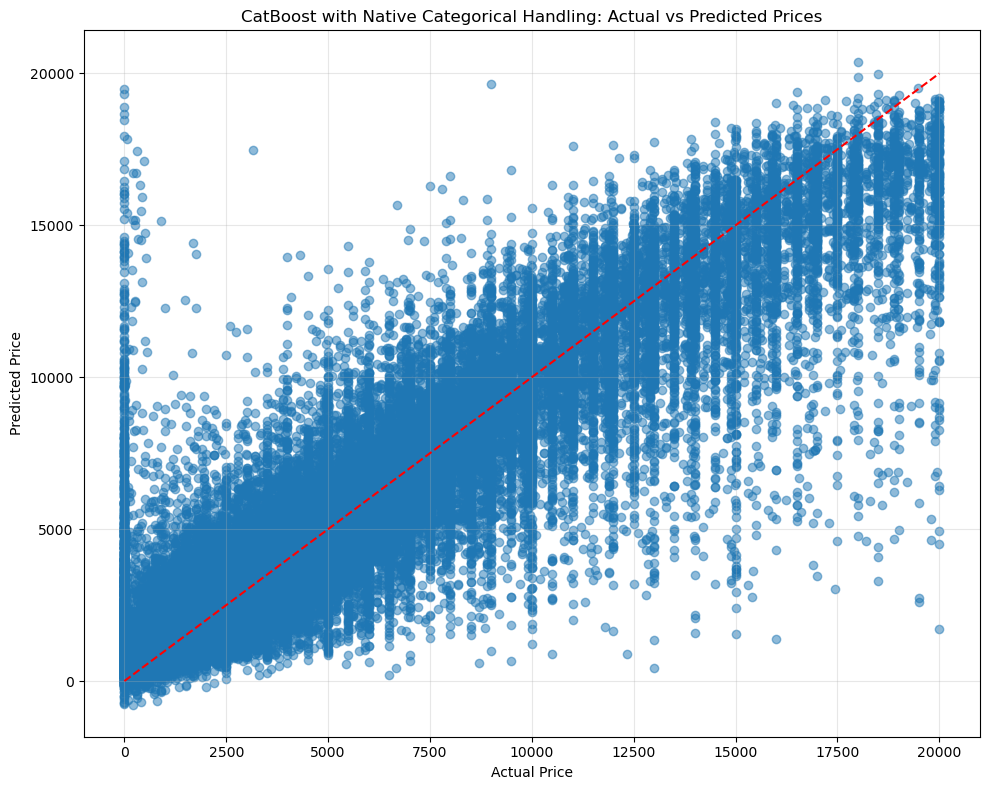

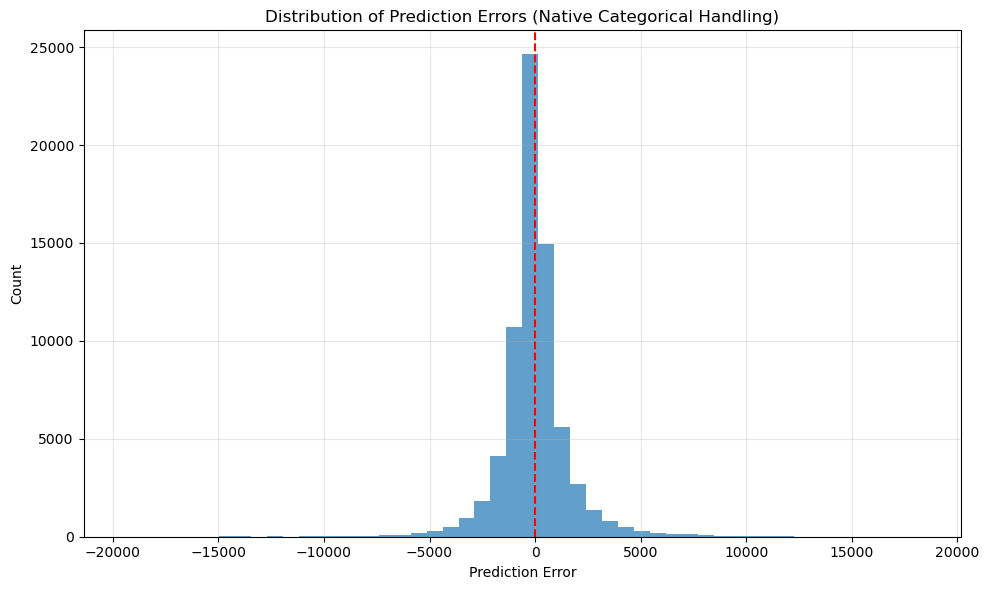


Error statistics:
  Mean error: -24.33
  Median error: -92.70
  Standard deviation: 1727.47
  Min error: -19493.79
  Max error: 18282.54

Total execution time: 105.40 seconds
Comparison with previous approach:
Previous best CatBoost RMSE (with OHE): 1739.02
Native categorical handling RMSE: 1727.63


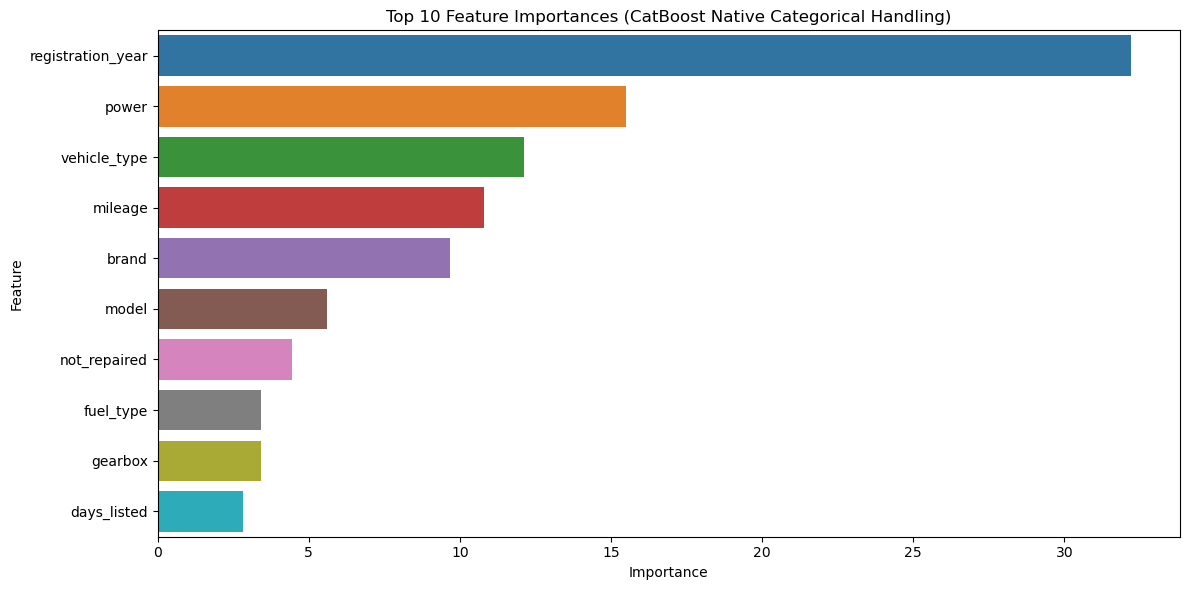

In [19]:
# Appendix B: Native Categorical Feature Handling with CatBoost
print("Appendix B: Using CatBoost's Native Categorical Feature Handling")
print("-" * 70)

# Start timer for the entire process
start_time_total = time.time()

# Define categorical and numerical features
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
numerical_features = ['registration_year', 'power', 'mileage', 'days_listed']

# Create copies to avoid modifying original data
X_train_native = X_train.copy()
X_val_native = X_val.copy()

# Scale numerical features only
scaler = StandardScaler()
X_train_native[numerical_features] = scaler.fit_transform(X_train_native[numerical_features])
X_val_native[numerical_features] = scaler.transform(X_val_native[numerical_features])

# Get categorical feature indices (CatBoost needs indices, not names)
cat_features_idx = [X_train_native.columns.get_loc(col) for col in categorical_features]

print("Data preparation completed for CatBoost native categorical handling")

# Create CatBoost pools with categorical features properly identified
train_pool = Pool(
    X_train_native, 
    y_train,
    cat_features=cat_features_idx
)

val_pool = Pool(
    X_val_native, 
    y_val,
    cat_features=cat_features_idx
)

# Define best parameters from previous tuning
params = {
    'iterations': 500,
    'learning_rate': 0.05,
    'depth': 12,
    'l2_leaf_reg': 5,
    'border_count': 128,
    'bagging_temperature': 10,
    'random_strength': 10,
    'random_seed': 42,
    'verbose': False
}

# Train the model with the best parameters
print("\nTraining CatBoost model with native categorical handling...")
train_start_time = time.time()

model = CatBoostRegressor(**params)
model.fit(train_pool, verbose=False)

training_time = time.time() - train_start_time
print(f"Model trained in {training_time:.2f} seconds")

# Evaluate on validation set
start_time = time.time()
y_pred_val = model.predict(X_val_native)
prediction_time = time.time() - start_time

# Calculate RMSE
val_rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"\nValidation Results for CatBoost with Native Categorical Handling:")
print(f"  RMSE: {val_rmse:.2f}")
print(f"  Training Time: {training_time:.2f} seconds")
print(f"  Prediction Time: {prediction_time:.4f} seconds")

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('CatBoost with Native Categorical Handling: Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create histogram of prediction errors
errors = y_val - y_pred_val
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors (Native Categorical Handling)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nError statistics:")
print(f"  Mean error: {errors.mean():.2f}")
print(f"  Median error: {np.median(errors):.2f}")
print(f"  Standard deviation: {errors.std():.2f}")
print(f"  Min error: {errors.min():.2f}")
print(f"  Max error: {errors.max():.2f}")

print(f"\nTotal execution time: {time.time() - start_time_total:.2f} seconds")
print("Comparison with previous approach:")
print(f"Previous best CatBoost RMSE (with OHE): 1739.02")
print(f"Native categorical handling RMSE: {val_rmse:.2f}")

# Feature importance
feature_importance = model.get_feature_importance()
feature_names = X_train_native.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances (CatBoost Native Categorical Handling)')
plt.tight_layout()
plt.show()